In [2]:
%load_ext kedro.ipython
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import mstats
from scipy.stats import boxcox
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.impute import KNNImputer

The kedro.ipython extension is already loaded. To reload it, use:
  %reload_ext kedro.ipython


In [3]:
data = catalog.load('data')
client_data = catalog.load('client_data')
client_transactions = catalog.load('client_transactions')
merged_data = catalog.load('merged_data')
data_groups = catalog.load('data_groups')
others = catalog.load('other_data')

[12/05/24 16:50:06] INFO     Loading data from data (ParquetDataset)...                         data_catalog.py:389

                    INFO     Loading data from client_data (ParquetDataset)...                  data_catalog.py:389

                    INFO     Loading data from client_transactions (ParquetDataset)...          data_catalog.py:389

                    INFO     Loading data from merged_data (ParquetDataset)...                  data_catalog.py:389

                    INFO     Loading data from data_groups (ParquetDataset)...                  data_catalog.py:389

                    INFO     Loading data from other_data (ParquetDataset)...                   data_catalog.py:389

In [4]:
others['Sex'] = others['Sex'].map({'H': 1, 'M': 0})

In [5]:
import torch

print("Number of GPU: ", torch.cuda.device_count())
print("GPU Name: ", torch.cuda.get_device_name())


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Number of GPU:  1
GPU Name:  NVIDIA GeForce RTX 4070 SUPER
Using device: cuda


In [5]:
# TPOT Regressor setup
tpot = TPOTRegressor(config_dict=tpot_config_regression, generations=5, population_size=20, verbosity=2)

# Fit TPOT
tpot.fit(X_train, y_train)

# Evaluate the model
print(f"R2 score on test set: {tpot.score(X_test, y_test)}")

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:2                                                                                    │
│                                                                                                  │
│   1 # TPOT Regressor setup                                                                       │
│ ❱ 2 tpot = TPOTRegressor(config_dict=tpot_config_regression, generations=5, population_size=     │
│   3                                                                                              │
│   4 # Fit TPOT                                                                                   │
│   5 tpot.fit(X_train, y_train)                                                                   │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'TPOTRegressor' is not defined

In [6]:
data.head()

Id  Subsegmento Sexo  Region  Edad     Renta  Antiguedad  Internauta  \
0   1          160    M    13.0    43       NaN         130           1   
1   2          160    H    13.0    46  143640.0          69           1   
2   3          170    H    13.0    45  929106.0          24           1   
3   4          151    H    13.0    46  172447.0         134           0   
4   5          170    H    13.0    46  805250.0         116           0   

   Adicional  Dualidad  ...  ColMx_T01  PagoNac_T01  PagoInt_T01  EeccNac_T01  \
0          1         0  ...        0.0        33000          0.0    1099866.0   
1          0         0  ...        0.0       300000          0.0     214592.0   
2          1         0  ...        0.0       216676          0.0          0.0   
3          1         0  ...        0.0        60000          0.0     272762.0   
4          1         1  ...        0.0       272925          0.0     249562.0   

   EeccInt_T01  UsoL1_T01  UsoL2_T01  UsoLI_T01  IndRev_T01  target  
0          0.0  1099866.0      15080        0.0           R       0  
1          0.0   214592.0      83596        0.0           R       0  
2          0.0     7400.0          0        0.0           T       0  
3          0.0   272762.0      10591        0.0           R       0  
4          0.0    75339.0     377782        0.0           R       0  

[5 rows x 574 columns]

In [7]:
dataset_dictionary = {
    'data':data,
    'client_data':client_data,
    'client_transactions':client_transactions,
    'merged_data':merged_data    
}

for key in dataset_dictionary:
    rows=dataset_dictionary[key].shape[0]
    columns=dataset_dictionary[key].shape[1]
    print(f"The dataset {key} has {rows} rows and {columns} columns.")

The dataset data has 51124 rows and 574 columns.
The dataset client_data has 51124 rows and 9 columns.
The dataset client_transactions has 51124 rows and 145 columns.
The dataset merged_data has 51124 rows and 153 columns.


In [8]:
dataset_dictionary = {
    'client_data':client_data,
    'client_transactions':client_transactions    
}

for key in dataset_dictionary:
    print(f"Dataset {key}")
    for columna in dataset_dictionary[key].columns:
        print("\n----------------------------------------")
        print(f"The data type of the column {columna} is {dataset_dictionary[key][columna].dtype}.")
        if int(dataset_dictionary[key][columna].isna().sum()) > 1 or int(dataset_dictionary[key][columna].isna().sum()) == 0:
            nullified="nulls"
        else:
            nullified = "null"
        print(f"The column {columna} has {int(dataset_dictionary[key][columna].isna().sum())} {nullified}.")
        print("----------------------------------------\n")
    print("\n")

Dataset client_data

----------------------------------------
The data type of the column ID is int64.
The column ID has 0 nulls.
----------------------------------------


----------------------------------------
The data type of the column Sex is float64.
The column Sex has 1 null.
----------------------------------------


----------------------------------------
The data type of the column Age is int64.
The column Age has 0 nulls.
----------------------------------------


----------------------------------------
The data type of the column Num_CC is int64.
The column Num_CC has 0 nulls.
----------------------------------------


----------------------------------------
The data type of the column National is int64.
The column National has 0 nulls.
----------------------------------------


----------------------------------------
The data type of the column International is float64.
The column International has 0 nulls.
----------------------------------------


------------------

In [9]:
nona = data_groups.dropna()

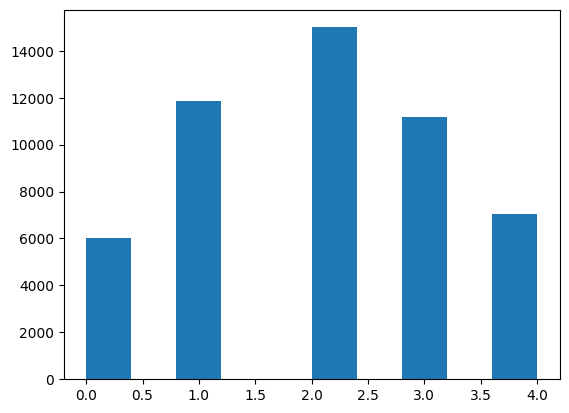

In [10]:
plt.hist(client_data['Age'])
plt.show()

In [12]:
print(merged_data.columns)

Index(['ID', 'Sex', 'Age', 'Num_CC', 'National', 'International', 'Income',
       'Num_Acc', 'Mon_Act', 'Int_Bill_CC_01',
       ...
       'Adv_Bill_DC_12', 'Pur_Bill_DC_12', 'Act_Indi_CC_12', 'Int_Acti_CC_12',
       'Nac_Acti_CC_12', 'Num_Tran_CC_12', 'Int_Tran_CC_12', 'Nac_Tran_CC_12',
       'Adv_Tran_DC_12', 'Pur_Tran_DC_12'],
      dtype='object', length=153)


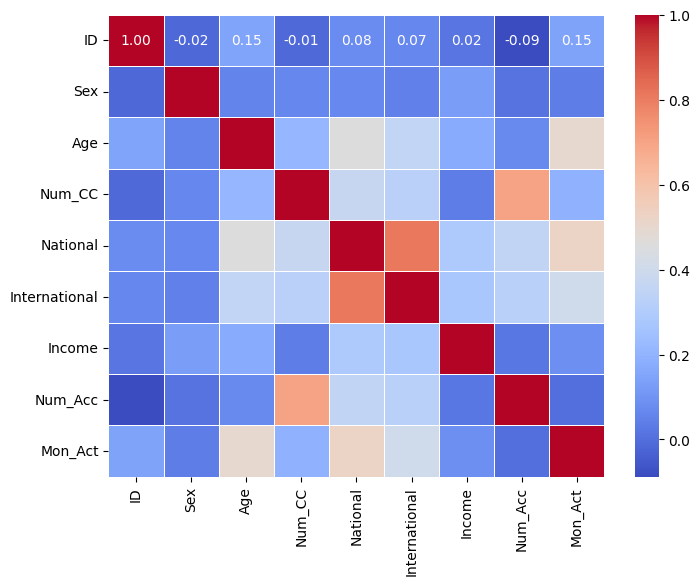

In [34]:
correlation_clientdata = client_data.corr()
# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_clientdata, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Show the plot
plt.show()

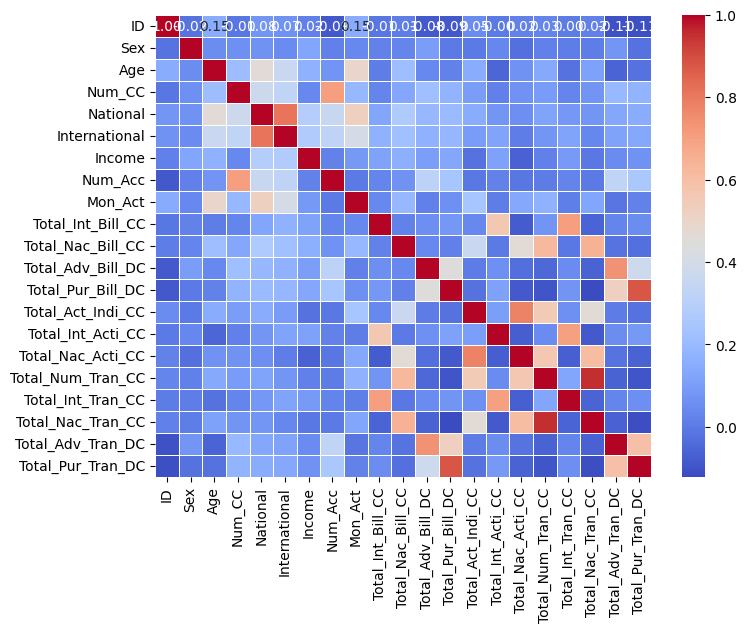

In [35]:
correlation_groups = data_groups.corr()
# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_groups, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Show the plot
plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [67]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
def scale_dataset1(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-2]].values
  y = dataframe[dataframe.columns[-2]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [68]:
knn_imputer = KNNImputer(n_neighbors=10, weights='uniform')
imputed = pd.DataFrame(knn_imputer.fit_transform(data_groups), columns=data_groups.columns)

In [69]:
dat = pd.DataFrame()
dat['Num_Acc'] = imputed['Num_Acc']
dat['National'] = imputed['National']
dat['International'] = imputed['International']

entreno, validacion, testeo = np.split(dat.sample(frac=1), [int(0.6*len(dat)), int(0.8*len(dat))])

entreno, X_entreno, y_entreno = scale_dataset(entreno, oversample=True)
validacion, X_validacion, y_validacion = scale_dataset(validacion, oversample=False)
testeo, X_testeo, y_testeo = scale_dataset(testeo, oversample=False)

[12/05/24 19:35:06] WARNING  C:\Program                                                             warnings.py:110
                             Files\Python311\Lib\site-packages\numpy\_core\fromnumeric.py:57:                      
                             FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed                 
                             in a future version. Please use 'DataFrame.transpose' instead.                        
                               return bound(*args, **kwds)                                                         
                                                                                                                   

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:8                                                                                    │
│                                                                                                  │
│    5                                                                                             │
│    6 entreno, validacion, testeo = np.split(dat.sample(frac=1), [int(0.6*len(dat)), int(0.8*l    │
│    7                                                                                             │
│ ❱  8 entreno, X_entreno, y_entreno = scale_dataset(entreno, oversample=True)                     │
│    9 validacion, X_validacion, y_validacion = scale_dataset(validacion, oversample=False)        │
│   10 testeo, X_testeo, y_testeo = scale_dataset(testeo, oversample=False)                        │
│   11                                                                                             │
│                                                                                                  │
│ in scale_dataset:12                                                                              │
│                                                                                                  │
│    9                                                                                             │
│   10   if oversample:                                                                            │
│   11 │   ros = RandomOverSampler()                                                               │
│ ❱ 12 │   X, y = ros.fit_resample(X, y)                                                           │
│   13                                                                                             │
│   14   data = np.hstack((X, np.reshape(y, (-1, 1))))                                             │
│   15                                                                                             │
│                                                                                                  │
│ C:\Program Files\Python311\Lib\site-packages\imblearn\base.py:208 in fit_resample                │
│                                                                                                  │
│ C:\Program Files\Python311\Lib\site-packages\imblearn\base.py:104 in fit_resample                │
│                                                                                                  │
│ C:\Program Files\Python311\Lib\site-packages\sklearn\utils\multiclass.py:219 in                  │
│ check_classification_targets                                                                     │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete 
classes on a regression target with continuous values.

In [ ]:
entreno, validacion, testeo = np.split(imputed.sample(frac=1), [int(0.6*len(imputed)), int(0.8*len(imputed))])

entreno, X_entreno, y_entreno = scale_dataset1(entreno, oversample=True)
validacion, X_validacion, y_validacion = scale_dataset1(validacion, oversample=False)
testeo, X_testeo, y_testeo = scale_dataset1(testeo, oversample=False)

In [19]:
tpot_config_regression = {
    'xgboost.XGBRegressor': {
        'n_estimators': [100, 200, 300],
        'max_depth': range(3, 10),
        'learning_rate': [0.01, 0.1, 0.2],
        'booster': ['gbtree', 'dart'],
        'tree_method': ['gpu_hist'],  # Use GPU
        'objective': ['reg:squarederror'],  # Regression objective
    },
    'lightgbm.LGBMRegressor': {
        'n_estimators': [100, 200, 300],
        'max_depth': range(3, 10),
        'learning_rate': [0.01, 0.1, 0.2],
        'boosting_type': ['gbdt'],
        'device': ['gpu'],  # Use GPU
    }
}

In [20]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
model = XGBRegressor(
    booster='dart',               
    learning_rate=0.2,            
    max_depth=3,                  
    n_estimators=100,             
    objective='reg:squarederror', 
    tree_method='gpu_hist'        
)

model.fit(X_entreno, y_entreno)

y_pred = model.predict(X_validacion)
  # Mean Squared Error
mse = mean_squared_error(y_validacion, y_pred)

  # Mean Absolute Error
mae = mean_absolute_error(y_validacion, y_pred)

  # R^2 Score
r2 = r2_score(y_validacion, y_pred)

  # Root Mean Squared Error
rmse = mean_squared_error(y_validacion, y_pred, squared=False)
  # Print all the metrics
print("----------------------------------------")
print(f"Mean Squared Error: {mse}\n")
print(f"Mean Absolute Error: {mae}\n")
print(f"R^2: {r2}\n")
print(f"Root Mean Squared Error: {rmse}\n")

print(f"Puntaje del modelo: {model.score(X_validacion, y_validacion)}\n")

[12/02/24 13:39:56] WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [13:39:56] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:2                
                             7: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU                   
                             training, set the `device` parameter to CUDA instead.                                 
                                                                                                                   
                                 E.g. tree_method = "hist", device = "cuda"                                        
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[12/02/24 13:40:08] WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [13:40:08] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:2                
                             7: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU                   
                             training, set the `device` parameter to CUDA instead.                                 
                                                                                                                   
                                 E.g. tree_method = "hist", device = "cuda"                                        
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [13:40:08] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:5                
                             8: Falling back to prediction using DMatrix due to mismatched devices.                
                             This might lead to higher memory usage and slower performance. XGBoost                
                             is running on: cuda:0, while the input data is on: cpu.                               
                             Potential solutions:                                                                  
                             - Use a data structure that matches the device ordinal in the booster.                
                             - Set the device for booster before call to inplace_predict.                          
                                                                                                                   
                             This warning will only be shown once.                                                 
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

                    WARNING  C:\Program                                                             warnings.py:110
                             Files\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492:                 
                             FutureWarning: 'squared' is deprecated in version 1.4 and will be                     
                             removed in 1.6. To calculate the root mean squared error, use the                     
                             function'root_mean_squared_error'.                                                    
                               warnings.warn(                                                                      
                                                                                                                   

----------------------------------------
Mean Squared Error: 4897.067093813136

Mean Absolute Error: 46.90041358855068

R^2: 0.27055905626056576

Root Mean Squared Error: 69.979047534338

Puntaje del modelo: 0.27055905626056576



In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
model = LinearRegression()
model.fit(X_entreno, y_entreno)
y_pred = model.predict(X_validacion)

  # Assuming y_true are the true values and y_pred are the predicted values

  # Mean Squared Error
mse = mean_squared_error(y_validacion, y_pred)

  # Mean Absolute Error
mae = mean_absolute_error(y_validacion, y_pred)

  # R^2 Score
r2 = r2_score(y_validacion, y_pred)

  # Root Mean Squared Error
rmse = mean_squared_error(y_validacion, y_pred, squared=False)

  # Print all the metrics
print("----------------------------------------")
print(f"Mean Squared Error: {mse}\n")
print(f"Mean Absolute Error: {mae}\n")
print(f"R^2: {r2}\n")
print(f"Root Mean Squared Error: {rmse}\n")

print(f"Puntaje del modelo: {model.score(X_validacion, y_validacion)}\n")

[12/02/24 13:40:09] WARNING  C:\Program                                                             warnings.py:110
                             Files\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492:                 
                             FutureWarning: 'squared' is deprecated in version 1.4 and will be                     
                             removed in 1.6. To calculate the root mean squared error, use the                     
                             function'root_mean_squared_error'.                                                    
                               warnings.warn(                                                                      
                                                                                                                   

----------------------------------------
Mean Squared Error: 13043.581245540996

Mean Absolute Error: 97.51986213384487

R^2: -0.9429021557637796

Root Mean Squared Error: 114.20849900747753

Puntaje del modelo: -0.9429021557637796



In [22]:
import tensorflow as tf
print(tf.__version__)

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 import tensorflow as tf                                                                      │
│   2 print(tf.__version__)                                                                        │
│   3                                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
ModuleNotFoundError: No module named 'tensorflow'

In [23]:
from tpot import TPOTRegressor
tpot_regressor = TPOTRegressor(verbosity=2, generations=10, population_size=40, random_state=42, scoring='r2')
tpot_regressor.fit(X_entreno, y_entreno)


print("Regresión Score (R²):", tpot_regressor.score(X_validacion, y_validacion))


y_pred = tpot_regressor.predict(X_validacion)


mae = mean_absolute_error(y_validacion, y_pred)
mse = mean_squared_error(y_validacion, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_validacion, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

Optimization Progress:   0%|          | 0/440 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -8.049368057026546

Generation 2 - Current best internal CV score: -8.049368057026546

Generation 3 - Current best internal CV score: -8.049368057026546

Generation 4 - Current best internal CV score: -8.049368057026546

Generation 5 - Current best internal CV score: -8.049368057026546

Generation 6 - Current best internal CV score: -8.04936584942391

Generation 7 - Current best internal CV score: -7.966542812991196

Generation 8 - Current best internal CV score: -7.611991485772966

Generation 9 - Current best internal CV score: -7.611991485772966

Generation 10 - Current best internal CV score: -7.611991485772966

Best pipeline: XGBRegressor(input_matrix, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, n_jobs=1, objective=reg:squarederror, subsample=0.9500000000000001, verbosity=0)
Regresión Score (R²): 0.5243170381270633
MAE: 33.88683164305821
MSE: 3193.474947723303
RMSE: 56.5108392056188
R²: 0.5243170381270633


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_entreno, y_entreno)
    scores.append(knn.score(X_entreno, y_entreno))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

In [25]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_entreno, y_entreno)

y_pred = knn_model.predict(X_testeo)

print(classification_report(y_testeo, y_pred))

[12/04/24 05:19:26] WARNING  C:\Program                                                             warnings.py:110
                             Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1                
                             531: UndefinedMetricWarning: Precision is ill-defined and being set to                
                             0.0 in labels with no predicted samples. Use `zero_division` parameter                
                             to control this behavior.                                                             
                               _warn_prf(average, modifier, f"{metric.capitalize()} is",                           
                             len(result))                                                                          
                                                                                                                   

                    WARNING  C:\Program                                                             warnings.py:110
                             Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1                
                             531: UndefinedMetricWarning: Recall is ill-defined and being set to                   
                             0.0 in labels with no true samples. Use `zero_division` parameter to                  
                             control this behavior.                                                                
                               _warn_prf(average, modifier, f"{metric.capitalize()} is",                           
                             len(result))                                                                          
                                                                                                                   

                    WARNING  C:\Program                                                             warnings.py:110
                             Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1                
                             531: UndefinedMetricWarning: Precision is ill-defined and being set to                
                             0.0 in labels with no predicted samples. Use `zero_division` parameter                
                             to control this behavior.                                                             
                               _warn_prf(average, modifier, f"{metric.capitalize()} is",                           
                             len(result))                                                                          
                                                                                                                   

                    WARNING  C:\Program                                                             warnings.py:110
                             Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1                
                             531: UndefinedMetricWarning: Recall is ill-defined and being set to                   
                             0.0 in labels with no true samples. Use `zero_division` parameter to                  
                             control this behavior.                                                                
                               _warn_prf(average, modifier, f"{metric.capitalize()} is",                           
                             len(result))                                                                          
                                                                                                                   

                    WARNING  C:\Program                                                             warnings.py:110
                             Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1                
                             531: UndefinedMetricWarning: Precision is ill-defined and being set to                
                             0.0 in labels with no predicted samples. Use `zero_division` parameter                
                             to control this behavior.                                                             
                               _warn_prf(average, modifier, f"{metric.capitalize()} is",                           
                             len(result))                                                                          
                                                                                                                   

                    WARNING  C:\Program                                                             warnings.py:110
                             Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1                
                             531: UndefinedMetricWarning: Recall is ill-defined and being set to                   
                             0.0 in labels with no true samples. Use `zero_division` parameter to                  
                             control this behavior.                                                                
                               _warn_prf(average, modifier, f"{metric.capitalize()} is",                           
                             len(result))                                                                          
                                                                                                                   

              precision    recall  f1-score   support

         0.0       0.73      0.44      0.55      2351
         1.0       0.03      0.04      0.03        71
         2.0       0.04      0.06      0.05       109
         3.0       0.02      0.04      0.03        55
         4.0       0.02      0.02      0.02        96
         5.0       0.02      0.01      0.02        68
         6.0       0.04      0.05      0.04        84
         7.0       0.00      0.00      0.00        51
         8.0       0.02      0.04      0.03        79
         9.0       0.03      0.03      0.03        66
        10.0       0.02      0.03      0.02        76
        11.0       0.04      0.04      0.04        51
        12.0       0.00      0.00      0.00        74
        13.0       0.04      0.06      0.05        47
        14.0       0.00      0.00      0.00        74
        15.0       0.00      0.00      0.00        47
        16.0       0.01      0.01      0.01        67
        17.0       0.02    

In [26]:
# Entrenar el modelo de regresión logística
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(X_entreno, y_entreno)

# Hacer predicciones
y_pred = logistic_model.predict(X_testeo)

# Evaluar el modelo
print(classification_report(y_testeo, y_pred))

[12/04/24 06:43:28] WARNING  C:\Program                                                             warnings.py:110
                             Files\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:46                
                             9: ConvergenceWarning: lbfgs failed to converge (status=1):                           
                             STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.                                          
                                                                                                                   
                             Increase the number of iterations (max_iter) or scale the data as                     
                             shown in:                                                                             
                                 https://scikit-learn.org/stable/modules/preprocessing.html                        
                             Please also refer to the documentation for alternative solver options:                
                                 https://scikit-learn.org/stable/modules/linear_model.html#logistic                
                             -regression                                                                           
                               n_iter_i = _check_optimize_result(                                                  
                                                                                                                   

                    WARNING  C:\Program                                                             warnings.py:110
                             Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1                
                             531: UndefinedMetricWarning: Precision is ill-defined and being set to                
                             0.0 in labels with no predicted samples. Use `zero_division` parameter                
                             to control this behavior.                                                             
                               _warn_prf(average, modifier, f"{metric.capitalize()} is",                           
                             len(result))                                                                          
                                                                                                                   

                    WARNING  C:\Program                                                             warnings.py:110
                             Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1                
                             531: UndefinedMetricWarning: Recall is ill-defined and being set to                   
                             0.0 in labels with no true samples. Use `zero_division` parameter to                  
                             control this behavior.                                                                
                               _warn_prf(average, modifier, f"{metric.capitalize()} is",                           
                             len(result))                                                                          
                                                                                                                   

                    WARNING  C:\Program                                                             warnings.py:110
                             Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1                
                             531: UndefinedMetricWarning: Precision is ill-defined and being set to                
                             0.0 in labels with no predicted samples. Use `zero_division` parameter                
                             to control this behavior.                                                             
                               _warn_prf(average, modifier, f"{metric.capitalize()} is",                           
                             len(result))                                                                          
                                                                                                                   

                    WARNING  C:\Program                                                             warnings.py:110
                             Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1                
                             531: UndefinedMetricWarning: Recall is ill-defined and being set to                   
                             0.0 in labels with no true samples. Use `zero_division` parameter to                  
                             control this behavior.                                                                
                               _warn_prf(average, modifier, f"{metric.capitalize()} is",                           
                             len(result))                                                                          
                                                                                                                   

                    WARNING  C:\Program                                                             warnings.py:110
                             Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1                
                             531: UndefinedMetricWarning: Precision is ill-defined and being set to                
                             0.0 in labels with no predicted samples. Use `zero_division` parameter                
                             to control this behavior.                                                             
                               _warn_prf(average, modifier, f"{metric.capitalize()} is",                           
                             len(result))                                                                          
                                                                                                                   

                    WARNING  C:\Program                                                             warnings.py:110
                             Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1                
                             531: UndefinedMetricWarning: Recall is ill-defined and being set to                   
                             0.0 in labels with no true samples. Use `zero_division` parameter to                  
                             control this behavior.                                                                
                               _warn_prf(average, modifier, f"{metric.capitalize()} is",                           
                             len(result))                                                                          
                                                                                                                   

              precision    recall  f1-score   support

         0.0       0.90      0.65      0.76      2351
         1.0       0.04      0.30      0.07        71
         2.0       0.07      0.12      0.09       109
         3.0       0.02      0.07      0.03        55
         4.0       0.11      0.05      0.07        96
         5.0       0.04      0.24      0.07        68
         6.0       0.10      0.06      0.08        84
         7.0       0.03      0.10      0.05        51
         8.0       0.07      0.10      0.08        79
         9.0       0.00      0.00      0.00        66
        10.0       0.07      0.01      0.02        76
        11.0       0.04      0.08      0.05        51
        12.0       0.07      0.05      0.06        74
        13.0       0.04      0.06      0.05        47
        14.0       0.00      0.00      0.00        74
        15.0       0.06      0.09      0.07        47
        16.0       0.04      0.03      0.03        67
        17.0       0.00    

In [37]:
client_data

ID  Sex  Age  Num_CC  National  International    Income  Num_Acc  \
0          1  0.0    3       3    798000         1210.0       NaN        1   
1          2  1.0    3       1    750000         1000.0  143640.0        1   
2          3  1.0    3       2   1350000         1500.0  929106.0        1   
3          4  1.0    3       2   1570800            0.0  172447.0        1   
4          5  1.0    3       3   2762000         6430.0  805250.0        2   
...      ...  ...  ...     ...       ...            ...       ...      ...   
51119  51120  1.0    3       3    999000          550.0  364978.0        2   
51120  51121  1.0    3       1   1744200          300.0  625376.0        1   
51121  51122  1.0    3       2   1061000         1526.0  806220.0        1   
51122  51123  0.0    3       1   1612000         2300.0       NaN        1   
51123  51124  1.0    3       2   2735424         3210.0  840878.0        1   

       Mon_Act  
0          130  
1           69  
2           24  
3          134  
4          116  
...        ...  
51119       57  
51120       39  
51121      153  
51122       11  
51123       75  

[51124 rows x 9 columns]

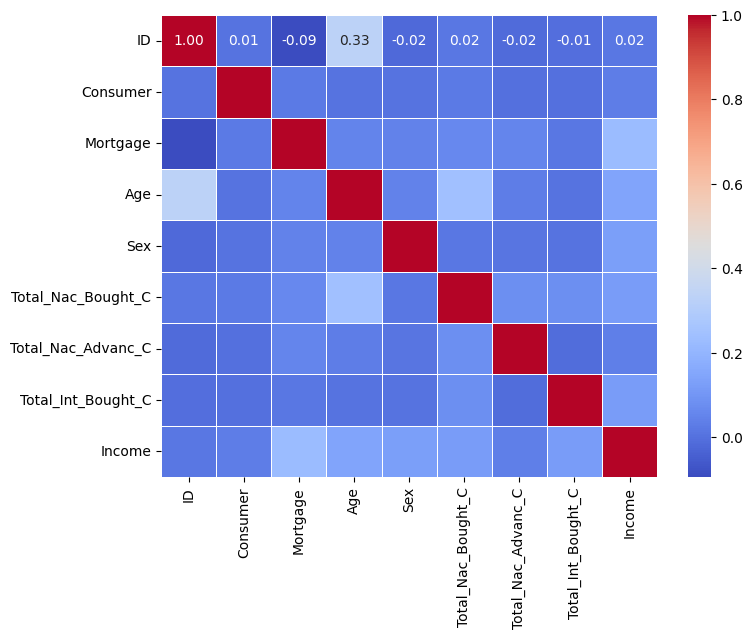

In [38]:
aa = pd.DataFrame(client_data[['ID','Income']])

others = others.merge(aa, on='ID', how='outer')

correlation_others = others.corr()
# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_others, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Show the plot
plt.show()

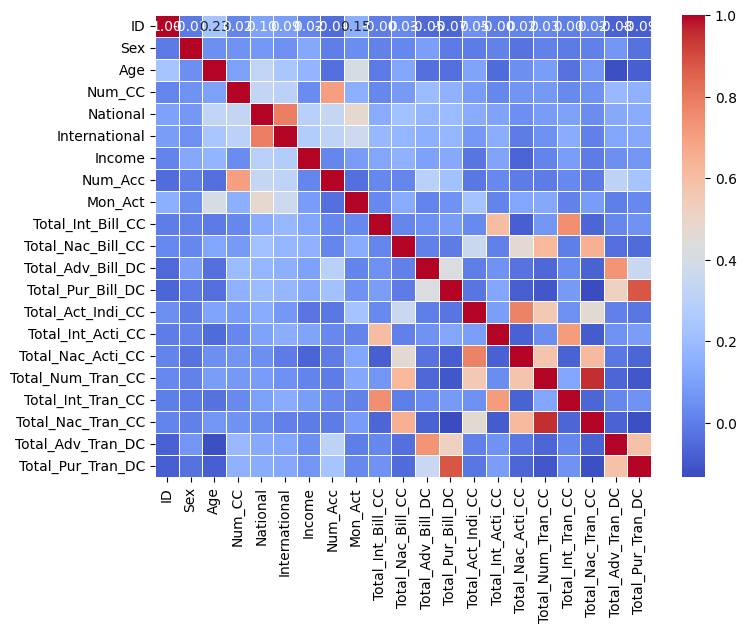

In [39]:
correlation_groups_no_nan = nona.corr()
# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_groups_no_nan, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Show the plot
plt.show()

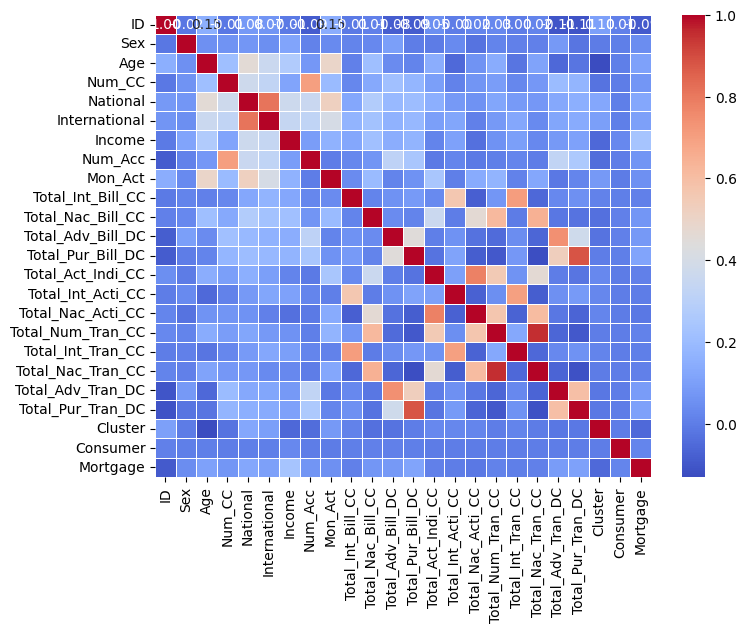

In [130]:
aa = pd.DataFrame(others[['ID','Consumer','Mortgage']])

imputed = imputed.merge(aa, on='ID', how='outer')


correlation_groups_imputed = imputed.corr()
# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_groups_imputed, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Show the plot
plt.show()

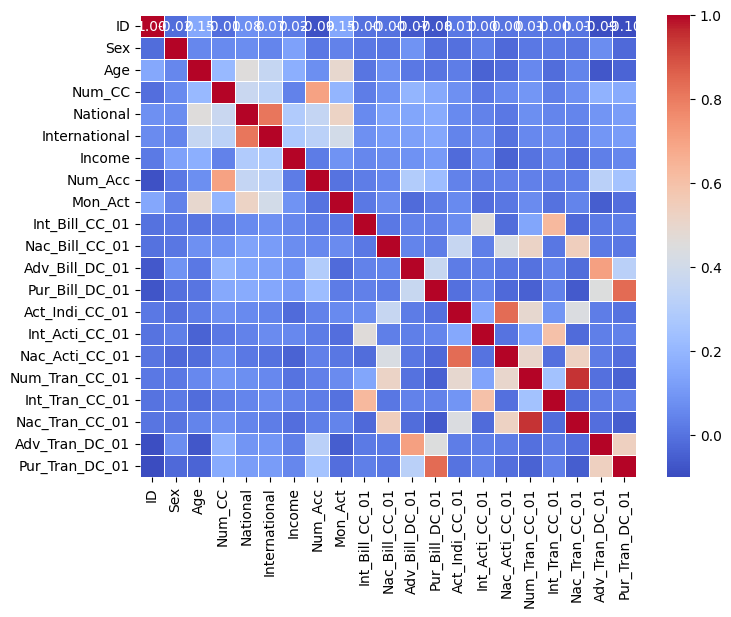

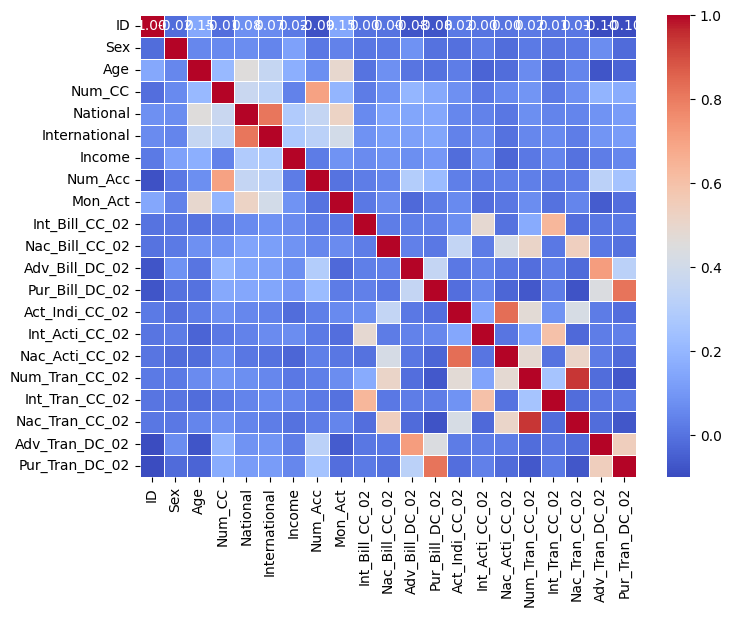

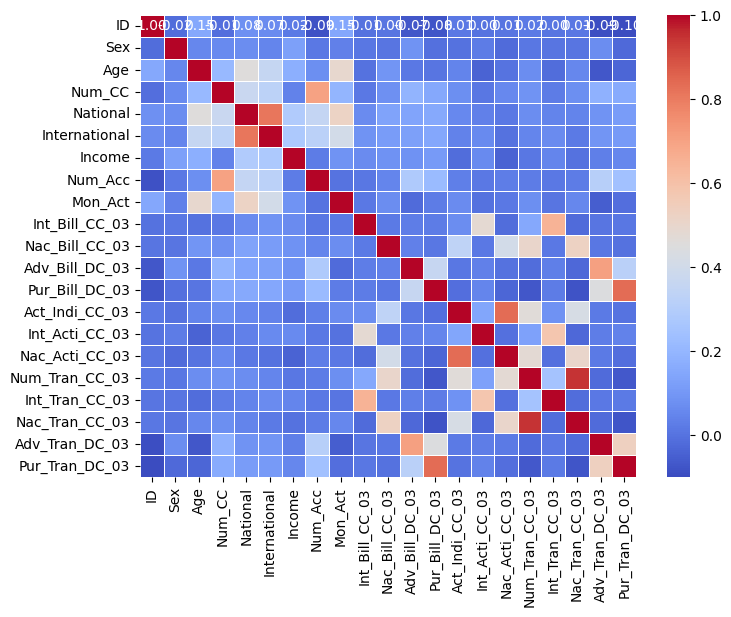

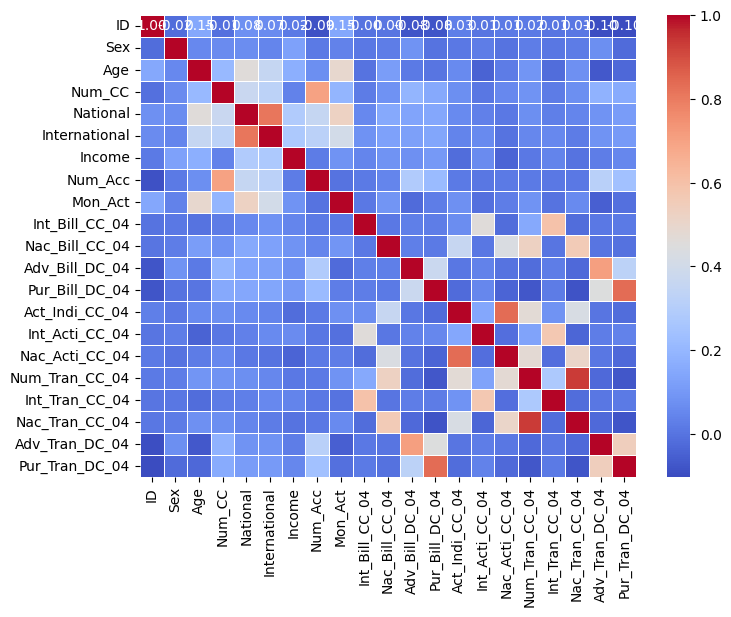

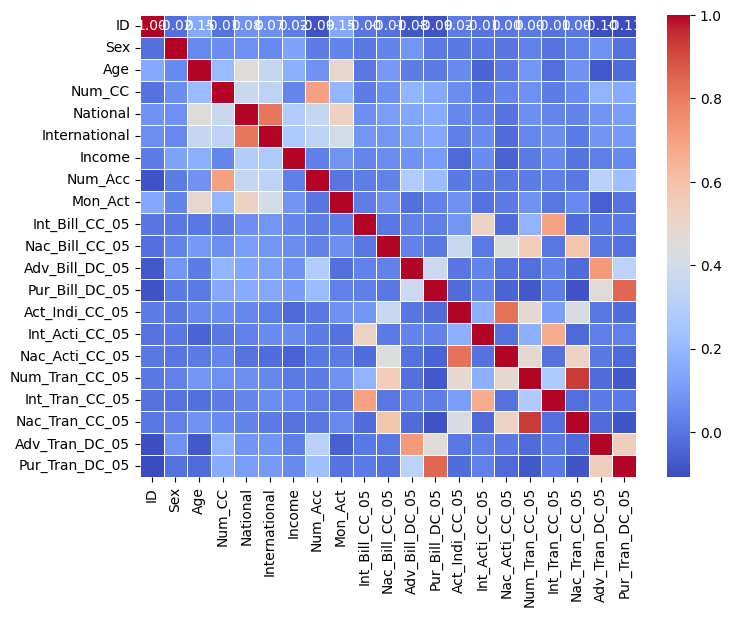

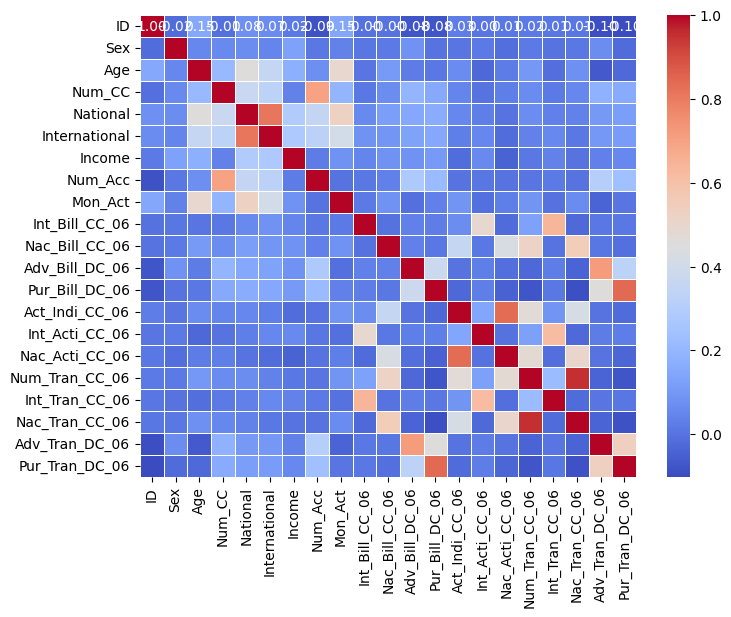

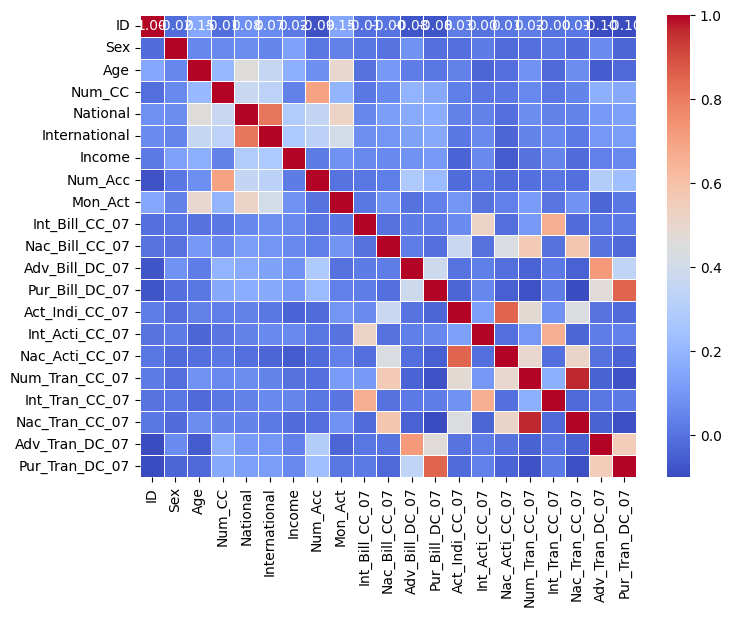

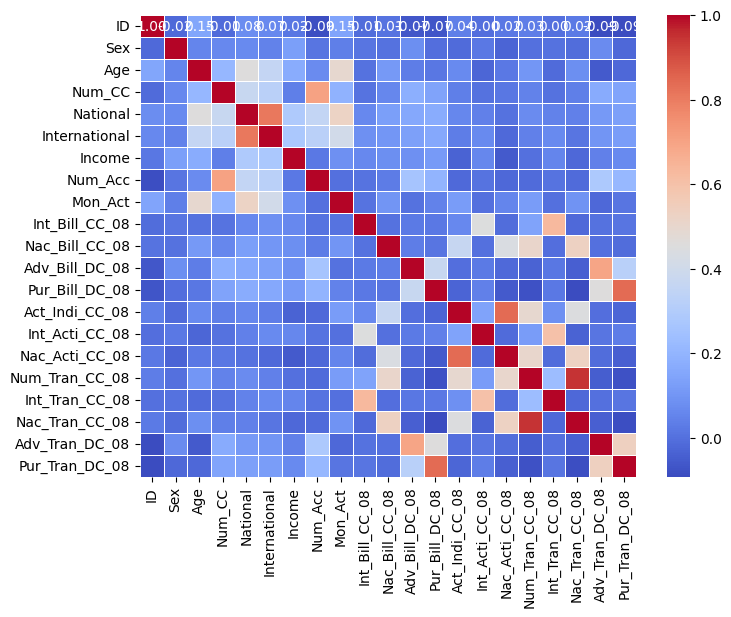

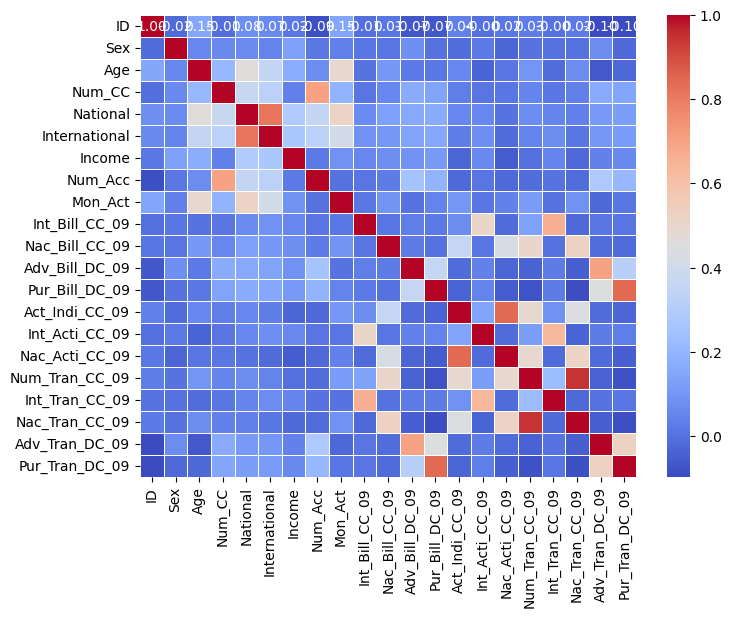

In [31]:
for i in range(1,10):
    correlation_merge = merged_data[['ID', 'Sex', 'Age', 'Num_CC', 'National', 'International','Income','Num_Acc','Mon_Act',
            f'Int_Bill_CC_0{i}', f'Nac_Bill_CC_0{i}',f'Adv_Bill_DC_0{i}',f'Pur_Bill_DC_0{i}', 
           f'Act_Indi_CC_0{i}', f'Int_Acti_CC_0{i}',f'Nac_Acti_CC_0{i}', f'Num_Tran_CC_0{i}', 
        f'Int_Tran_CC_0{i}', f'Nac_Tran_CC_0{i}',f'Adv_Tran_DC_0{i}', f'Pur_Tran_DC_0{i}']].corr()
    # Create the heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_merge, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    
    # Show the plot
    plt.show()

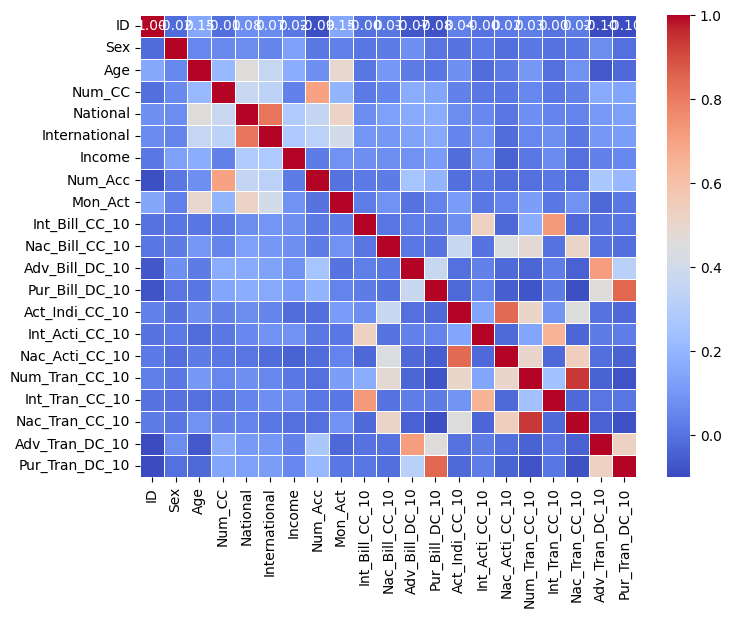

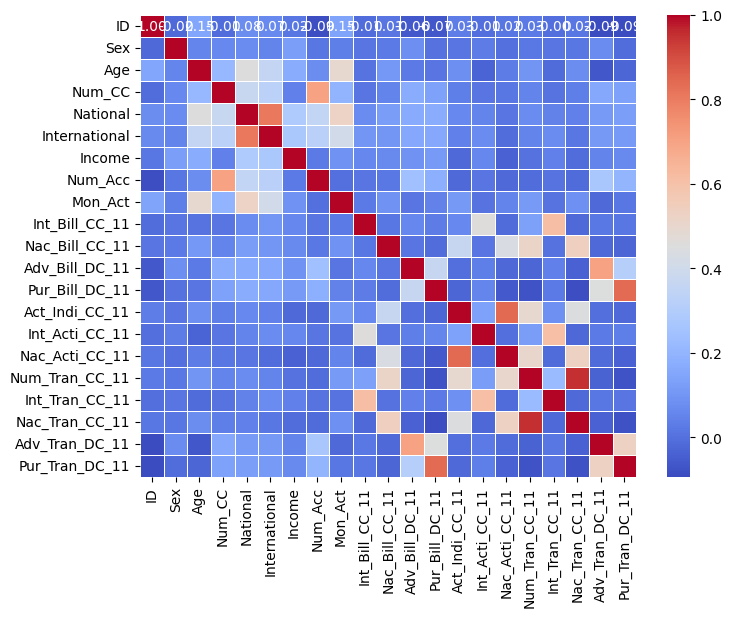

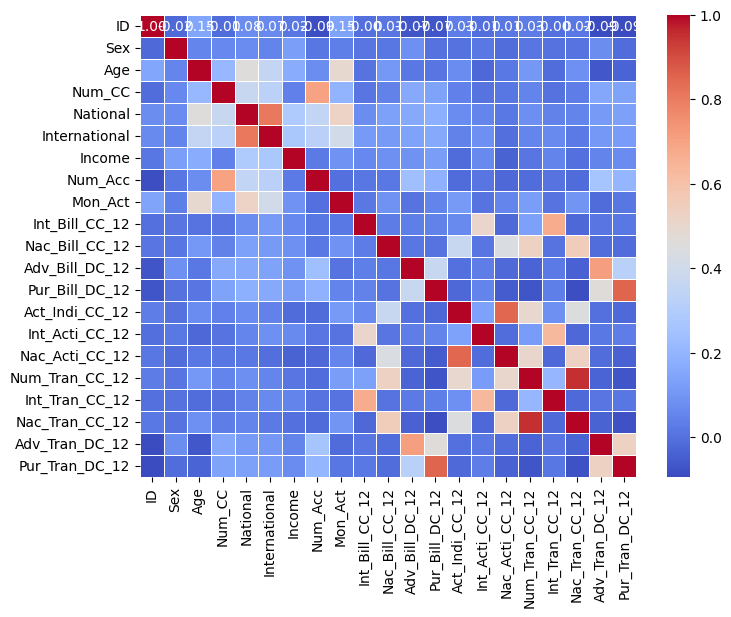

In [32]:
for i in range(10,13):
    correlation_merge = merged_data[['ID', 'Sex', 'Age', 'Num_CC', 'National', 'International','Income','Num_Acc','Mon_Act',
            f'Int_Bill_CC_{i}', f'Nac_Bill_CC_{i}',f'Adv_Bill_DC_{i}',f'Pur_Bill_DC_{i}', 
           f'Act_Indi_CC_{i}', f'Int_Acti_CC_{i}',f'Nac_Acti_CC_{i}', f'Num_Tran_CC_{i}', 
        f'Int_Tran_CC_{i}', f'Nac_Tran_CC_{i}',f'Adv_Tran_DC_{i}', f'Pur_Tran_DC_{i}']].corr()
    # Create the heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_merge, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    
    # Show the plot
    plt.show()

In [33]:

# TPOT Regressor setup
from tpot import TPOTRegressor
tpot = TPOTRegressor(config_dict=tpot_config_regression, generations=5, population_size=20, verbosity=2)

# Fit TPOT
tpot.fit(X_entreno, y_entreno)

# Evaluate the model
print(f"R2 score on test set: {tpot.score(X_testeo, y_testeo)}")

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 195
[LightGBM] [Info] Number of data points in the train set: 50, number of used features: 13
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4070 SUPER, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 13 dense feature groups (0.00 MB) transferred to GPU in 0.003378 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 235.880000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

[12/04/24 06:43:46] WARNING  Code block execution exceeded 10 seconds timeout                           utils.py:81
                             ╭────────────────── Traceback (most recent call last) ───────────────────╮            
                             │ C:\Program Files\Python311\Lib\site-packages\stopit\utils.py:145 in    │            
                             │ wrapper                                                                │            
                             │                                                                        │            
                             │   142 │   │   │   │   with self.to_ctx_mgr(timeout, swallow_exc=True): │            
                             │   143 │   │   │   │   │   result = self.default  # noqa                │            
                             │   144 │   │   │   │   │   # ``result`` may not be assigned below in ca │            
                             │ ❱ 145 │   │   │   │   │   result = func(*args, **kwargs)               │            
                             │   146 │   │   │   │   return result                                    │            
                             │   147 │   │   │   else:                                                │            
                             │   148 │   │   │   │   return func(*args, **kwargs)                     │            
                             │                                                                        │            
                             │ C:\Program Files\Python311\Lib\site-packages\tpot\decorators.py:57 in  │            
                             │ time_limited_call                                                      │            
                             │                                                                        │            
                             │    54 │   """                                                          │            
                             │    55 │   @threading_timeoutable(default="timeout")                    │            
                             │    56 │   def time_limited_call(func, *args):                          │            
                             │ ❱  57 │   │   func(*args)                                              │            
                             │    58 │                                                                │            
                             │    59 │   @wraps(func)                                                 │            
                             │    60 │   def check_pipeline(self, *args, **kwargs):                   │            
                             │                                                                        │            
                             │ C:\Program Files\Python311\Lib\site-packages\sklearn\base.py:1473 in   │            
                             │ wrapper                                                                │            
                             │                                                                        │            
                             │   1470 │   │   │   │   │   prefer_skip_nested_validation or global_ski │            
                             │   1471 │   │   │   │   )                                               │            
                             │   1472 │   │   │   ):                                                  │            
                             │ ❱ 1473 │   │   │   │   return fit_method(estimator, *args, **kwargs)   │            
                             │   1474 │   │                                                           │            
                             │   1475 │   │   return wrapper                                          │            
                             │   1476                                                                 │            
                             │                          

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 195
[LightGBM] [Info] Number of data points in the train set: 50, number of used features: 13
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4070 SUPER, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 13 dense feature groups (0.00 MB) transferred to GPU in 0.001412 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 235.880000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

[12/04/24 06:43:57] WARNING  Code block execution exceeded 10 seconds timeout                           utils.py:81
                             ╭────────────────── Traceback (most recent call last) ───────────────────╮            
                             │ C:\Program Files\Python311\Lib\site-packages\stopit\utils.py:145 in    │            
                             │ wrapper                                                                │            
                             │                                                                        │            
                             │   142 │   │   │   │   with self.to_ctx_mgr(timeout, swallow_exc=True): │            
                             │   143 │   │   │   │   │   result = self.default  # noqa                │            
                             │   144 │   │   │   │   │   # ``result`` may not be assigned below in ca │            
                             │ ❱ 145 │   │   │   │   │   result = func(*args, **kwargs)               │            
                             │   146 │   │   │   │   return result                                    │            
                             │   147 │   │   │   else:                                                │            
                             │   148 │   │   │   │   return func(*args, **kwargs)                     │            
                             │                                                                        │            
                             │ C:\Program Files\Python311\Lib\site-packages\tpot\decorators.py:57 in  │            
                             │ time_limited_call                                                      │            
                             │                                                                        │            
                             │    54 │   """                                                          │            
                             │    55 │   @threading_timeoutable(default="timeout")                    │            
                             │    56 │   def time_limited_call(func, *args):                          │            
                             │ ❱  57 │   │   func(*args)                                              │            
                             │    58 │                                                                │            
                             │    59 │   @wraps(func)                                                 │            
                             │    60 │   def check_pipeline(self, *args, **kwargs):                   │            
                             │                                                                        │            
                             │ C:\Program Files\Python311\Lib\site-packages\sklearn\base.py:1473 in   │            
                             │ wrapper                                                                │            
                             │                                                                        │            
                             │   1470 │   │   │   │   │   prefer_skip_nested_validation or global_ski │            
                             │   1471 │   │   │   │   )                                               │            
                             │   1472 │   │   │   ):                                                  │            
                             │ ❱ 1473 │   │   │   │   return fit_method(estimator, *args, **kwargs)   │            
                             │   1474 │   │                                                           │            
                             │   1475 │   │   return wrapper                                          │            
                             │   1476                                                                 │            
                             │                          

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 195
[LightGBM] [Info] Number of data points in the train set: 50, number of used features: 13
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4070 SUPER, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 13 dense feature groups (0.00 MB) transferred to GPU in 0.002005 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 235.880000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 2706
[LightGBM] [Info] Number of data points in the train set: 2919844, number of used features: 19
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4070 SUPER, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 16 dense feature groups (44.55 MB) transferred to GPU in 0.026738 secs. 1 sparse feature groups
[LightGBM] [Info] Start training from score 345.529268
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

[12/04/24 06:55:32] WARNING  Code block execution exceeded 10 seconds timeout                           utils.py:81
                             ╭────────────────── Traceback (most recent call last) ───────────────────╮            
                             │ C:\Program Files\Python311\Lib\site-packages\stopit\utils.py:145 in    │            
                             │ wrapper                                                                │            
                             │                                                                        │            
                             │   142 │   │   │   │   with self.to_ctx_mgr(timeout, swallow_exc=True): │            
                             │   143 │   │   │   │   │   result = self.default  # noqa                │            
                             │   144 │   │   │   │   │   # ``result`` may not be assigned below in ca │            
                             │ ❱ 145 │   │   │   │   │   result = func(*args, **kwargs)               │            
                             │   146 │   │   │   │   return result                                    │            
                             │   147 │   │   │   else:                                                │            
                             │   148 │   │   │   │   return func(*args, **kwargs)                     │            
                             │                                                                        │            
                             │ C:\Program Files\Python311\Lib\site-packages\tpot\decorators.py:57 in  │            
                             │ time_limited_call                                                      │            
                             │                                                                        │            
                             │    54 │   """                                                          │            
                             │    55 │   @threading_timeoutable(default="timeout")                    │            
                             │    56 │   def time_limited_call(func, *args):                          │            
                             │ ❱  57 │   │   func(*args)                                              │            
                             │    58 │                                                                │            
                             │    59 │   @wraps(func)                                                 │            
                             │    60 │   def check_pipeline(self, *args, **kwargs):                   │            
                             │                                                                        │            
                             │ C:\Program Files\Python311\Lib\site-packages\sklearn\base.py:1473 in   │            
                             │ wrapper                                                                │            
                             │                                                                        │            
                             │   1470 │   │   │   │   │   prefer_skip_nested_validation or global_ski │            
                             │   1471 │   │   │   │   )                                               │            
                             │   1472 │   │   │   ):                                                  │            
                             │ ❱ 1473 │   │   │   │   return fit_method(estimator, *args, **kwargs)   │            
                             │   1474 │   │                                                           │            
                             │   1475 │   │   return wrapper                                          │            
                             │   1476                                                                 │            
                             │                          

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 2706
[LightGBM] [Info] Number of data points in the train set: 2919844, number of used features: 19
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4070 SUPER, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 16 dense feature groups (44.55 MB) transferred to GPU in 0.030951 secs. 1 sparse feature groups
[LightGBM] [Info] Start training from score 345.529268
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 2771
[LightGBM] [Info] Number of data points in the train set: 2919844, number of used features: 19
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4070 SUPER, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram 

[12/04/24 07:04:59] WARNING  Code block execution exceeded 10 seconds timeout                           utils.py:81
                             ╭────────────────── Traceback (most recent call last) ───────────────────╮            
                             │ C:\Program Files\Python311\Lib\site-packages\stopit\utils.py:145 in    │            
                             │ wrapper                                                                │            
                             │                                                                        │            
                             │   142 │   │   │   │   with self.to_ctx_mgr(timeout, swallow_exc=True): │            
                             │   143 │   │   │   │   │   result = self.default  # noqa                │            
                             │   144 │   │   │   │   │   # ``result`` may not be assigned below in ca │            
                             │ ❱ 145 │   │   │   │   │   result = func(*args, **kwargs)               │            
                             │   146 │   │   │   │   return result                                    │            
                             │   147 │   │   │   else:                                                │            
                             │   148 │   │   │   │   return func(*args, **kwargs)                     │            
                             │                                                                        │            
                             │ C:\Program Files\Python311\Lib\site-packages\tpot\decorators.py:57 in  │            
                             │ time_limited_call                                                      │            
                             │                                                                        │            
                             │    54 │   """                                                          │            
                             │    55 │   @threading_timeoutable(default="timeout")                    │            
                             │    56 │   def time_limited_call(func, *args):                          │            
                             │ ❱  57 │   │   func(*args)                                              │            
                             │    58 │                                                                │            
                             │    59 │   @wraps(func)                                                 │            
                             │    60 │   def check_pipeline(self, *args, **kwargs):                   │            
                             │                                                                        │            
                             │ C:\Program Files\Python311\Lib\site-packages\sklearn\base.py:1473 in   │            
                             │ wrapper                                                                │            
                             │                                                                        │            
                             │   1470 │   │   │   │   │   prefer_skip_nested_validation or global_ski │            
                             │   1471 │   │   │   │   )                                               │            
                             │   1472 │   │   │   ):                                                  │            
                             │ ❱ 1473 │   │   │   │   return fit_method(estimator, *args, **kwargs)   │            
                             │   1474 │   │                                                           │            
                             │   1475 │   │   return wrapper                                          │            
                             │   1476                                                                 │            
                             │                          

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 195
[LightGBM] [Info] Number of data points in the train set: 50, number of used features: 13
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4070 SUPER, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 13 dense feature groups (0.00 MB) transferred to GPU in 0.000975 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 235.880000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

[12/04/24 07:05:13] WARNING  Code block execution exceeded 10 seconds timeout                           utils.py:81
                             ╭────────────────── Traceback (most recent call last) ───────────────────╮            
                             │ C:\Program Files\Python311\Lib\site-packages\stopit\utils.py:145 in    │            
                             │ wrapper                                                                │            
                             │                                                                        │            
                             │   142 │   │   │   │   with self.to_ctx_mgr(timeout, swallow_exc=True): │            
                             │   143 │   │   │   │   │   result = self.default  # noqa                │            
                             │   144 │   │   │   │   │   # ``result`` may not be assigned below in ca │            
                             │ ❱ 145 │   │   │   │   │   result = func(*args, **kwargs)               │            
                             │   146 │   │   │   │   return result                                    │            
                             │   147 │   │   │   else:                                                │            
                             │   148 │   │   │   │   return func(*args, **kwargs)                     │            
                             │                                                                        │            
                             │ C:\Program Files\Python311\Lib\site-packages\tpot\decorators.py:57 in  │            
                             │ time_limited_call                                                      │            
                             │                                                                        │            
                             │    54 │   """                                                          │            
                             │    55 │   @threading_timeoutable(default="timeout")                    │            
                             │    56 │   def time_limited_call(func, *args):                          │            
                             │ ❱  57 │   │   func(*args)                                              │            
                             │    58 │                                                                │            
                             │    59 │   @wraps(func)                                                 │            
                             │    60 │   def check_pipeline(self, *args, **kwargs):                   │            
                             │                                                                        │            
                             │ C:\Program Files\Python311\Lib\site-packages\sklearn\base.py:1473 in   │            
                             │ wrapper                                                                │            
                             │                                                                        │            
                             │   1470 │   │   │   │   │   prefer_skip_nested_validation or global_ski │            
                             │   1471 │   │   │   │   )                                               │            
                             │   1472 │   │   │   ):                                                  │            
                             │ ❱ 1473 │   │   │   │   return fit_method(estimator, *args, **kwargs)   │            
                             │   1474 │   │                                                           │            
                             │   1475 │   │   return wrapper                                          │            
                             │   1476                                                                 │            
                             │                          

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 195
[LightGBM] [Info] Number of data points in the train set: 50, number of used features: 13
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4070 SUPER, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 13 dense feature groups (0.00 MB) transferred to GPU in 0.000880 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 235.880000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

[12/04/24 07:22:34] WARNING  Code block execution exceeded 10 seconds timeout                           utils.py:81
                             ╭────────────────── Traceback (most recent call last) ───────────────────╮            
                             │ C:\Program Files\Python311\Lib\site-packages\stopit\utils.py:145 in    │            
                             │ wrapper                                                                │            
                             │                                                                        │            
                             │   142 │   │   │   │   with self.to_ctx_mgr(timeout, swallow_exc=True): │            
                             │   143 │   │   │   │   │   result = self.default  # noqa                │            
                             │   144 │   │   │   │   │   # ``result`` may not be assigned below in ca │            
                             │ ❱ 145 │   │   │   │   │   result = func(*args, **kwargs)               │            
                             │   146 │   │   │   │   return result                                    │            
                             │   147 │   │   │   else:                                                │            
                             │   148 │   │   │   │   return func(*args, **kwargs)                     │            
                             │                                                                        │            
                             │ C:\Program Files\Python311\Lib\site-packages\tpot\decorators.py:57 in  │            
                             │ time_limited_call                                                      │            
                             │                                                                        │            
                             │    54 │   """                                                          │            
                             │    55 │   @threading_timeoutable(default="timeout")                    │            
                             │    56 │   def time_limited_call(func, *args):                          │            
                             │ ❱  57 │   │   func(*args)                                              │            
                             │    58 │                                                                │            
                             │    59 │   @wraps(func)                                                 │            
                             │    60 │   def check_pipeline(self, *args, **kwargs):                   │            
                             │                                                                        │            
                             │ C:\Program Files\Python311\Lib\site-packages\sklearn\base.py:1473 in   │            
                             │ wrapper                                                                │            
                             │                                                                        │            
                             │   1470 │   │   │   │   │   prefer_skip_nested_validation or global_ski │            
                             │   1471 │   │   │   │   )                                               │            
                             │   1472 │   │   │   ):                                                  │            
                             │ ❱ 1473 │   │   │   │   return fit_method(estimator, *args, **kwargs)   │            
                             │   1474 │   │                                                           │            
                             │   1475 │   │   return wrapper                                          │            
                             │   1476                                                                 │            
                             │                          

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 195
[LightGBM] [Info] Number of data points in the train set: 50, number of used features: 13
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4070 SUPER, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 13 dense feature groups (0.00 MB) transferred to GPU in 0.000813 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 235.880000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

[12/04/24 07:22:45] WARNING  Code block execution exceeded 10 seconds timeout                           utils.py:81
                             ╭────────────────── Traceback (most recent call last) ───────────────────╮            
                             │ C:\Program Files\Python311\Lib\site-packages\stopit\utils.py:145 in    │            
                             │ wrapper                                                                │            
                             │                                                                        │            
                             │   142 │   │   │   │   with self.to_ctx_mgr(timeout, swallow_exc=True): │            
                             │   143 │   │   │   │   │   result = self.default  # noqa                │            
                             │   144 │   │   │   │   │   # ``result`` may not be assigned below in ca │            
                             │ ❱ 145 │   │   │   │   │   result = func(*args, **kwargs)               │            
                             │   146 │   │   │   │   return result                                    │            
                             │   147 │   │   │   else:                                                │            
                             │   148 │   │   │   │   return func(*args, **kwargs)                     │            
                             │                                                                        │            
                             │ C:\Program Files\Python311\Lib\site-packages\tpot\decorators.py:57 in  │            
                             │ time_limited_call                                                      │            
                             │                                                                        │            
                             │    54 │   """                                                          │            
                             │    55 │   @threading_timeoutable(default="timeout")                    │            
                             │    56 │   def time_limited_call(func, *args):                          │            
                             │ ❱  57 │   │   func(*args)                                              │            
                             │    58 │                                                                │            
                             │    59 │   @wraps(func)                                                 │            
                             │    60 │   def check_pipeline(self, *args, **kwargs):                   │            
                             │                                                                        │            
                             │ C:\Program Files\Python311\Lib\site-packages\sklearn\base.py:1473 in   │            
                             │ wrapper                                                                │            
                             │                                                                        │            
                             │   1470 │   │   │   │   │   prefer_skip_nested_validation or global_ski │            
                             │   1471 │   │   │   │   )                                               │            
                             │   1472 │   │   │   ):                                                  │            
                             │ ❱ 1473 │   │   │   │   return fit_method(estimator, *args, **kwargs)   │            
                             │   1474 │   │                                                           │            
                             │   1475 │   │   return wrapper                                          │            
                             │   1476                                                                 │            
                             │                          

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 195
[LightGBM] [Info] Number of data points in the train set: 50, number of used features: 13
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4070 SUPER, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 13 dense feature groups (0.00 MB) transferred to GPU in 0.000761 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 235.880000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

[12/04/24 07:23:04] WARNING  Code block execution exceeded 10 seconds timeout                           utils.py:81
                             ╭────────────────── Traceback (most recent call last) ───────────────────╮            
                             │ C:\Program Files\Python311\Lib\site-packages\stopit\utils.py:145 in    │            
                             │ wrapper                                                                │            
                             │                                                                        │            
                             │   142 │   │   │   │   with self.to_ctx_mgr(timeout, swallow_exc=True): │            
                             │   143 │   │   │   │   │   result = self.default  # noqa                │            
                             │   144 │   │   │   │   │   # ``result`` may not be assigned below in ca │            
                             │ ❱ 145 │   │   │   │   │   result = func(*args, **kwargs)               │            
                             │   146 │   │   │   │   return result                                    │            
                             │   147 │   │   │   else:                                                │            
                             │   148 │   │   │   │   return func(*args, **kwargs)                     │            
                             │                                                                        │            
                             │ C:\Program Files\Python311\Lib\site-packages\tpot\decorators.py:57 in  │            
                             │ time_limited_call                                                      │            
                             │                                                                        │            
                             │    54 │   """                                                          │            
                             │    55 │   @threading_timeoutable(default="timeout")                    │            
                             │    56 │   def time_limited_call(func, *args):                          │            
                             │ ❱  57 │   │   func(*args)                                              │            
                             │    58 │                                                                │            
                             │    59 │   @wraps(func)                                                 │            
                             │    60 │   def check_pipeline(self, *args, **kwargs):                   │            
                             │                                                                        │            
                             │ C:\Program Files\Python311\Lib\site-packages\sklearn\base.py:1473 in   │            
                             │ wrapper                                                                │            
                             │                                                                        │            
                             │   1470 │   │   │   │   │   prefer_skip_nested_validation or global_ski │            
                             │   1471 │   │   │   │   )                                               │            
                             │   1472 │   │   │   ):                                                  │            
                             │ ❱ 1473 │   │   │   │   return fit_method(estimator, *args, **kwargs)   │            
                             │   1474 │   │                                                           │            
                             │   1475 │   │   return wrapper                                          │            
                             │   1476                                                                 │            
                             │                          

[12/04/24 07:23:14] WARNING  Code block execution exceeded 10 seconds timeout                           utils.py:81
                             ╭────────────────── Traceback (most recent call last) ───────────────────╮            
                             │ C:\Program Files\Python311\Lib\site-packages\stopit\utils.py:145 in    │            
                             │ wrapper                                                                │            
                             │                                                                        │            
                             │   142 │   │   │   │   with self.to_ctx_mgr(timeout, swallow_exc=True): │            
                             │   143 │   │   │   │   │   result = self.default  # noqa                │            
                             │   144 │   │   │   │   │   # ``result`` may not be assigned below in ca │            
                             │ ❱ 145 │   │   │   │   │   result = func(*args, **kwargs)               │            
                             │   146 │   │   │   │   return result                                    │            
                             │   147 │   │   │   else:                                                │            
                             │   148 │   │   │   │   return func(*args, **kwargs)                     │            
                             │                                                                        │            
                             │ C:\Program Files\Python311\Lib\site-packages\tpot\decorators.py:57 in  │            
                             │ time_limited_call                                                      │            
                             │                                                                        │            
                             │    54 │   """                                                          │            
                             │    55 │   @threading_timeoutable(default="timeout")                    │            
                             │    56 │   def time_limited_call(func, *args):                          │            
                             │ ❱  57 │   │   func(*args)                                              │            
                             │    58 │                                                                │            
                             │    59 │   @wraps(func)                                                 │            
                             │    60 │   def check_pipeline(self, *args, **kwargs):                   │            
                             │                                                                        │            
                             │ C:\Program Files\Python311\Lib\site-packages\sklearn\base.py:1473 in   │            
                             │ wrapper                                                                │            
                             │                                                                        │            
                             │   1470 │   │   │   │   │   prefer_skip_nested_validation or global_ski │            
                             │   1471 │   │   │   │   )                                               │            
                             │   1472 │   │   │   ):                                                  │            
                             │ ❱ 1473 │   │   │   │   return fit_method(estimator, *args, **kwargs)   │            
                             │   1474 │   │                                                           │            
                             │   1475 │   │   return wrapper                                          │            
                             │   1476                                                                 │            
                             │                          

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 2706
[LightGBM] [Info] Number of data points in the train set: 2919844, number of used features: 19
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4070 SUPER, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 16 dense feature groups (44.55 MB) transferred to GPU in 0.027702 secs. 1 sparse feature groups
[LightGBM] [Info] Start training from score 345.529268
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

[12/04/24 07:40:04] WARNING  Code block execution exceeded 10 seconds timeout                           utils.py:81
                             ╭────────────────── Traceback (most recent call last) ───────────────────╮            
                             │ C:\Program Files\Python311\Lib\site-packages\stopit\utils.py:145 in    │            
                             │ wrapper                                                                │            
                             │                                                                        │            
                             │   142 │   │   │   │   with self.to_ctx_mgr(timeout, swallow_exc=True): │            
                             │   143 │   │   │   │   │   result = self.default  # noqa                │            
                             │   144 │   │   │   │   │   # ``result`` may not be assigned below in ca │            
                             │ ❱ 145 │   │   │   │   │   result = func(*args, **kwargs)               │            
                             │   146 │   │   │   │   return result                                    │            
                             │   147 │   │   │   else:                                                │            
                             │   148 │   │   │   │   return func(*args, **kwargs)                     │            
                             │                                                                        │            
                             │ C:\Program Files\Python311\Lib\site-packages\tpot\decorators.py:57 in  │            
                             │ time_limited_call                                                      │            
                             │                                                                        │            
                             │    54 │   """                                                          │            
                             │    55 │   @threading_timeoutable(default="timeout")                    │            
                             │    56 │   def time_limited_call(func, *args):                          │            
                             │ ❱  57 │   │   func(*args)                                              │            
                             │    58 │                                                                │            
                             │    59 │   @wraps(func)                                                 │            
                             │    60 │   def check_pipeline(self, *args, **kwargs):                   │            
                             │                                                                        │            
                             │ C:\Program Files\Python311\Lib\site-packages\sklearn\base.py:1473 in   │            
                             │ wrapper                                                                │            
                             │                                                                        │            
                             │   1470 │   │   │   │   │   prefer_skip_nested_validation or global_ski │            
                             │   1471 │   │   │   │   )                                               │            
                             │   1472 │   │   │   ):                                                  │            
                             │ ❱ 1473 │   │   │   │   return fit_method(estimator, *args, **kwargs)   │            
                             │   1474 │   │                                                           │            
                             │   1475 │   │   return wrapper                                          │            
                             │   1476                                                                 │            
                             │                          

[12/04/24 07:40:15] WARNING  Code block execution exceeded 10 seconds timeout                           utils.py:81
                             ╭────────────────── Traceback (most recent call last) ───────────────────╮            
                             │ C:\Program Files\Python311\Lib\site-packages\stopit\utils.py:145 in    │            
                             │ wrapper                                                                │            
                             │                                                                        │            
                             │   142 │   │   │   │   with self.to_ctx_mgr(timeout, swallow_exc=True): │            
                             │   143 │   │   │   │   │   result = self.default  # noqa                │            
                             │   144 │   │   │   │   │   # ``result`` may not be assigned below in ca │            
                             │ ❱ 145 │   │   │   │   │   result = func(*args, **kwargs)               │            
                             │   146 │   │   │   │   return result                                    │            
                             │   147 │   │   │   else:                                                │            
                             │   148 │   │   │   │   return func(*args, **kwargs)                     │            
                             │                                                                        │            
                             │ C:\Program Files\Python311\Lib\site-packages\tpot\decorators.py:57 in  │            
                             │ time_limited_call                                                      │            
                             │                                                                        │            
                             │    54 │   """                                                          │            
                             │    55 │   @threading_timeoutable(default="timeout")                    │            
                             │    56 │   def time_limited_call(func, *args):                          │            
                             │ ❱  57 │   │   func(*args)                                              │            
                             │    58 │                                                                │            
                             │    59 │   @wraps(func)                                                 │            
                             │    60 │   def check_pipeline(self, *args, **kwargs):                   │            
                             │                                                                        │            
                             │ C:\Program Files\Python311\Lib\site-packages\sklearn\base.py:1473 in   │            
                             │ wrapper                                                                │            
                             │                                                                        │            
                             │   1470 │   │   │   │   │   prefer_skip_nested_validation or global_ski │            
                             │   1471 │   │   │   │   )                                               │            
                             │   1472 │   │   │   ):                                                  │            
                             │ ❱ 1473 │   │   │   │   return fit_method(estimator, *args, **kwargs)   │            
                             │   1474 │   │                                                           │            
                             │   1475 │   │   return wrapper                                          │            
                             │   1476                                                                 │            
                             │                          

[12/04/24 07:40:25] WARNING  Code block execution exceeded 10 seconds timeout                           utils.py:81
                             ╭────────────────── Traceback (most recent call last) ───────────────────╮            
                             │ C:\Program Files\Python311\Lib\site-packages\stopit\utils.py:145 in    │            
                             │ wrapper                                                                │            
                             │                                                                        │            
                             │   142 │   │   │   │   with self.to_ctx_mgr(timeout, swallow_exc=True): │            
                             │   143 │   │   │   │   │   result = self.default  # noqa                │            
                             │   144 │   │   │   │   │   # ``result`` may not be assigned below in ca │            
                             │ ❱ 145 │   │   │   │   │   result = func(*args, **kwargs)               │            
                             │   146 │   │   │   │   return result                                    │            
                             │   147 │   │   │   else:                                                │            
                             │   148 │   │   │   │   return func(*args, **kwargs)                     │            
                             │                                                                        │            
                             │ C:\Program Files\Python311\Lib\site-packages\tpot\decorators.py:57 in  │            
                             │ time_limited_call                                                      │            
                             │                                                                        │            
                             │    54 │   """                                                          │            
                             │    55 │   @threading_timeoutable(default="timeout")                    │            
                             │    56 │   def time_limited_call(func, *args):                          │            
                             │ ❱  57 │   │   func(*args)                                              │            
                             │    58 │                                                                │            
                             │    59 │   @wraps(func)                                                 │            
                             │    60 │   def check_pipeline(self, *args, **kwargs):                   │            
                             │                                                                        │            
                             │ C:\Program Files\Python311\Lib\site-packages\sklearn\base.py:1473 in   │            
                             │ wrapper                                                                │            
                             │                                                                        │            
                             │   1470 │   │   │   │   │   prefer_skip_nested_validation or global_ski │            
                             │   1471 │   │   │   │   )                                               │            
                             │   1472 │   │   │   ):                                                  │            
                             │ ❱ 1473 │   │   │   │   return fit_method(estimator, *args, **kwargs)   │            
                             │   1474 │   │                                                           │            
                             │   1475 │   │   return wrapper                                          │            
                             │   1476                                                                 │            
                             │                          

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 195
[LightGBM] [Info] Number of data points in the train set: 50, number of used features: 13
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4070 SUPER, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 13 dense feature groups (0.00 MB) transferred to GPU in 0.000781 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 235.880000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

[12/04/24 07:40:38] WARNING  Code block execution exceeded 10 seconds timeout                           utils.py:81
                             ╭────────────────── Traceback (most recent call last) ───────────────────╮            
                             │ C:\Program Files\Python311\Lib\site-packages\stopit\utils.py:145 in    │            
                             │ wrapper                                                                │            
                             │                                                                        │            
                             │   142 │   │   │   │   with self.to_ctx_mgr(timeout, swallow_exc=True): │            
                             │   143 │   │   │   │   │   result = self.default  # noqa                │            
                             │   144 │   │   │   │   │   # ``result`` may not be assigned below in ca │            
                             │ ❱ 145 │   │   │   │   │   result = func(*args, **kwargs)               │            
                             │   146 │   │   │   │   return result                                    │            
                             │   147 │   │   │   else:                                                │            
                             │   148 │   │   │   │   return func(*args, **kwargs)                     │            
                             │                                                                        │            
                             │ C:\Program Files\Python311\Lib\site-packages\tpot\decorators.py:57 in  │            
                             │ time_limited_call                                                      │            
                             │                                                                        │            
                             │    54 │   """                                                          │            
                             │    55 │   @threading_timeoutable(default="timeout")                    │            
                             │    56 │   def time_limited_call(func, *args):                          │            
                             │ ❱  57 │   │   func(*args)                                              │            
                             │    58 │                                                                │            
                             │    59 │   @wraps(func)                                                 │            
                             │    60 │   def check_pipeline(self, *args, **kwargs):                   │            
                             │                                                                        │            
                             │ C:\Program Files\Python311\Lib\site-packages\sklearn\base.py:1473 in   │            
                             │ wrapper                                                                │            
                             │                                                                        │            
                             │   1470 │   │   │   │   │   prefer_skip_nested_validation or global_ski │            
                             │   1471 │   │   │   │   )                                               │            
                             │   1472 │   │   │   ):                                                  │            
                             │ ❱ 1473 │   │   │   │   return fit_method(estimator, *args, **kwargs)   │            
                             │   1474 │   │                                                           │            
                             │   1475 │   │   return wrapper                                          │            
                             │   1476                                                                 │            
                             │                          

[12/04/24 07:40:49] WARNING  Code block execution exceeded 10 seconds timeout                           utils.py:81
                             ╭────────────────── Traceback (most recent call last) ───────────────────╮            
                             │ C:\Program Files\Python311\Lib\site-packages\stopit\utils.py:145 in    │            
                             │ wrapper                                                                │            
                             │                                                                        │            
                             │   142 │   │   │   │   with self.to_ctx_mgr(timeout, swallow_exc=True): │            
                             │   143 │   │   │   │   │   result = self.default  # noqa                │            
                             │   144 │   │   │   │   │   # ``result`` may not be assigned below in ca │            
                             │ ❱ 145 │   │   │   │   │   result = func(*args, **kwargs)               │            
                             │   146 │   │   │   │   return result                                    │            
                             │   147 │   │   │   else:                                                │            
                             │   148 │   │   │   │   return func(*args, **kwargs)                     │            
                             │                                                                        │            
                             │ C:\Program Files\Python311\Lib\site-packages\tpot\decorators.py:57 in  │            
                             │ time_limited_call                                                      │            
                             │                                                                        │            
                             │    54 │   """                                                          │            
                             │    55 │   @threading_timeoutable(default="timeout")                    │            
                             │    56 │   def time_limited_call(func, *args):                          │            
                             │ ❱  57 │   │   func(*args)                                              │            
                             │    58 │                                                                │            
                             │    59 │   @wraps(func)                                                 │            
                             │    60 │   def check_pipeline(self, *args, **kwargs):                   │            
                             │                                                                        │            
                             │ C:\Program Files\Python311\Lib\site-packages\sklearn\base.py:1473 in   │            
                             │ wrapper                                                                │            
                             │                                                                        │            
                             │   1470 │   │   │   │   │   prefer_skip_nested_validation or global_ski │            
                             │   1471 │   │   │   │   )                                               │            
                             │   1472 │   │   │   ):                                                  │            
                             │ ❱ 1473 │   │   │   │   return fit_method(estimator, *args, **kwargs)   │            
                             │   1474 │   │                                                           │            
                             │   1475 │   │   return wrapper                                          │            
                             │   1476                                                                 │            
                             │                          

[12/04/24 07:40:59] WARNING  Code block execution exceeded 10 seconds timeout                           utils.py:81
                             ╭────────────────── Traceback (most recent call last) ───────────────────╮            
                             │ C:\Program Files\Python311\Lib\site-packages\stopit\utils.py:145 in    │            
                             │ wrapper                                                                │            
                             │                                                                        │            
                             │   142 │   │   │   │   with self.to_ctx_mgr(timeout, swallow_exc=True): │            
                             │   143 │   │   │   │   │   result = self.default  # noqa                │            
                             │   144 │   │   │   │   │   # ``result`` may not be assigned below in ca │            
                             │ ❱ 145 │   │   │   │   │   result = func(*args, **kwargs)               │            
                             │   146 │   │   │   │   return result                                    │            
                             │   147 │   │   │   else:                                                │            
                             │   148 │   │   │   │   return func(*args, **kwargs)                     │            
                             │                                                                        │            
                             │ C:\Program Files\Python311\Lib\site-packages\tpot\decorators.py:57 in  │            
                             │ time_limited_call                                                      │            
                             │                                                                        │            
                             │    54 │   """                                                          │            
                             │    55 │   @threading_timeoutable(default="timeout")                    │            
                             │    56 │   def time_limited_call(func, *args):                          │            
                             │ ❱  57 │   │   func(*args)                                              │            
                             │    58 │                                                                │            
                             │    59 │   @wraps(func)                                                 │            
                             │    60 │   def check_pipeline(self, *args, **kwargs):                   │            
                             │                                                                        │            
                             │ C:\Program Files\Python311\Lib\site-packages\sklearn\base.py:1473 in   │            
                             │ wrapper                                                                │            
                             │                                                                        │            
                             │   1470 │   │   │   │   │   prefer_skip_nested_validation or global_ski │            
                             │   1471 │   │   │   │   )                                               │            
                             │   1472 │   │   │   ):                                                  │            
                             │ ❱ 1473 │   │   │   │   return fit_method(estimator, *args, **kwargs)   │            
                             │   1474 │   │                                                           │            
                             │   1475 │   │   return wrapper                                          │            
                             │   1476                                                                 │            
                             │                          

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 195
[LightGBM] [Info] Number of data points in the train set: 50, number of used features: 13
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4070 SUPER, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 64 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 13 dense feature groups (0.00 MB) transferred to GPU in 0.000874 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 235.880000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

[12/04/24 07:54:10] WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [07:54:10] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:2                
                             7: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU                   
                             training, set the `device` parameter to CUDA instead.                                 
                                                                                                                   
                                 E.g. tree_method = "hist", device = "cuda"                                        
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

R2 score on test set: -3217.2886513807416


In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# --- Carga de datos y selección de características ---
# Supongamos que 'dat' es el DataFrame con las variables relevantes.
dat = pd.DataFrame()
dat['Num_Acc'] = imputed['Num_Acc']  # Variable objetivo
dat['National'] = imputed['National']
dat['International'] = imputed['International']

# --- División de datos en entrenamiento, validación y prueba ---
train, valid, test = np.split(dat.sample(frac=1, random_state=42), [int(0.6*len(dat)), int(0.8*len(dat))])

X_train = train.drop(columns=['Num_Acc'])
y_train = train['Num_Acc']

X_valid = valid.drop(columns=['Num_Acc'])
y_valid = valid['Num_Acc']

X_test = test.drop(columns=['Num_Acc'])
y_test = test['Num_Acc']

# --- Escalado de características ---
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

# --- Creación del modelo ---
model = XGBRegressor(
    booster='dart',               # Tipo de booster
    learning_rate=0.2,            # Tasa de aprendizaje
    max_depth=3,                  # Profundidad máxima del árbol
    n_estimators=100,             # Número de árboles
    objective='reg:squarederror', # Objetivo de regresión
    tree_method='gpu_hist',       # Uso de GPU
    random_state=42               # Reproducibilidad
)

# --- Entrenamiento del modelo ---
model.fit(X_train, y_train)

# --- Evaluación del modelo ---
y_pred_valid = model.predict(X_valid)
y_pred_test = model.predict(X_test)

# Métricas para validación
mse_valid = mean_squared_error(y_valid, y_pred_valid)
mae_valid = mean_absolute_error(y_valid, y_pred_valid)
r2_valid = r2_score(y_valid, y_pred_valid)
rmse_valid = mean_squared_error(y_valid, y_pred_valid, squared=False)

# Métricas para prueba
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)

# --- Impresión de resultados ---
print("Resultados de Validación:")
print(f"Mean Squared Error: {mse_valid}")
print(f"Mean Absolute Error: {mae_valid}")
print(f"R^2: {r2_valid}")
print(f"Root Mean Squared Error: {rmse_valid}\n")

print("Resultados de Prueba:")
print(f"Mean Squared Error: {mse_test}")
print(f"Mean Absolute Error: {mae_test}")
print(f"R^2: {r2_test}")
print(f"Root Mean Squared Error: {rmse_test}\n")

# Puntaje general del modelo en el conjunto de validación
print(f"Puntaje del modelo en validación: {model.score(X_valid, y_valid)}")


[12/05/24 17:21:56] WARNING  C:\Program                                                             warnings.py:110
                             Files\Python311\Lib\site-packages\numpy\_core\fromnumeric.py:57:                      
                             FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed                 
                             in a future version. Please use 'DataFrame.transpose' instead.                        
                               return bound(*args, **kwds)                                                         
                                                                                                                   

                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [17:21:56] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:2                
                             7: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU                   
                             training, set the `device` parameter to CUDA instead.                                 
                                                                                                                   
                                 E.g. tree_method = "hist", device = "cuda"                                        
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[12/05/24 17:21:58] WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [17:21:58] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:2                
                             7: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU                   
                             training, set the `device` parameter to CUDA instead.                                 
                                                                                                                   
                                 E.g. tree_method = "hist", device = "cuda"                                        
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

                    WARNING  C:\Program                                                             warnings.py:110
                             Files\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492:                 
                             FutureWarning: 'squared' is deprecated in version 1.4 and will be                     
                             removed in 1.6. To calculate the root mean squared error, use the                     
                             function'root_mean_squared_error'.                                                    
                               warnings.warn(                                                                      
                                                                                                                   

                    WARNING  C:\Program                                                             warnings.py:110
                             Files\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492:                 
                             FutureWarning: 'squared' is deprecated in version 1.4 and will be                     
                             removed in 1.6. To calculate the root mean squared error, use the                     
                             function'root_mean_squared_error'.                                                    
                               warnings.warn(                                                                      
                                                                                                                   

Resultados de Validación:
Mean Squared Error: 173737.88739372342
Mean Absolute Error: 316.9982738494873
R^2: -1.7400753498077393
Root Mean Squared Error: 416.81877044313086

Resultados de Prueba:
Mean Squared Error: 81924.72091420632
Mean Absolute Error: 247.86828155517577
R^2: -0.461112380027771
Root Mean Squared Error: 286.2249480988796

Puntaje del modelo en validación: -1.7400753498077393


In [41]:
aa = pd.DataFrame(others[['ID','Consumer','Mortgage']])

imputed = imputed.merge(aa, on='ID', how='outer')

corr_matrix = imputed.corr()  # Calcula la matriz de correlación
high_corr = corr_matrix.unstack().sort_values(ascending=False)  # Ordena las correlaciones
high_corr = high_corr[high_corr != 1]  # Excluye la correlación perfecta (1)
print(high_corr.head(30))  # Muestra las 10 correlaciones más altas


Total_Num_Tran_CC  Total_Nac_Tran_CC    0.952140
Total_Nac_Tran_CC  Total_Num_Tran_CC    0.952140
Total_Pur_Tran_DC  Total_Pur_Bill_DC    0.881225
Total_Pur_Bill_DC  Total_Pur_Tran_DC    0.881225
International      National             0.811707
National           International        0.811707
Total_Nac_Acti_CC  Total_Act_Indi_CC    0.780128
Total_Act_Indi_CC  Total_Nac_Acti_CC    0.780128
Total_Adv_Bill_DC  Total_Adv_Tran_DC    0.740139
Total_Adv_Tran_DC  Total_Adv_Bill_DC    0.740139
Total_Int_Tran_CC  Total_Int_Bill_CC    0.705699
Total_Int_Bill_CC  Total_Int_Tran_CC    0.705699
Num_Acc            Num_CC               0.702329
Num_CC             Num_Acc              0.702329
Total_Int_Tran_CC  Total_Int_Acti_CC    0.699185
Total_Int_Acti_CC  Total_Int_Tran_CC    0.699185
Total_Nac_Bill_CC  Total_Nac_Tran_CC    0.646509
Total_Nac_Tran_CC  Total_Nac_Bill_CC    0.646509
Total_Num_Tran_CC  Total_Nac_Bill_CC    0.619765
Total_Nac_Bill_CC  Total_Num_Tran_CC    0.619765
Total_Nac_Acti_CC  T

In [42]:
selected_features = [
    'Total_Num_Tran_CC', 'Total_Nac_Tran_CC',
    'Total_Pur_Bill_DC', 'Total_Pur_Tran_DC',
    'International', 'National',
    'Total_Act_Indi_CC', 'Total_Nac_Acti_CC',
    'Total_Adv_Bill_DC', 'Total_Adv_Tran_DC'
]


In [71]:
from tpot import TPOTRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Verificar columnas disponibles
print("Columnas disponibles en imputed:", imputed.columns)

# Ajustar las características seleccionadas
selected_features_1 = [
    'Total_Num_Tran_CC', 'Total_Nac_Tran_CC',
    'Total_Pur_Bill_DC', 'Total_Pur_Tran_DC',
    'International', 'National',
    'Total_Act_Indi_CC', 'Total_Nac_Acti_CC',
    'Total_Adv_Bill_DC', 'Total_Adv_Tran_DC'
]

selected_features_1 = [col for col in selected_features_1 if col in imputed.columns]

selected_features_2 = [
    'Total_Nac_Acti_CC', 'Total_Act_Indi_CC',
    'Total_Nac_Bill_CC', 'Total_Int_Bill_CC',
    'Num_CC', 'Num_Acc'
]

selected_features_2 = [col for col in selected_features_2 if col in imputed.columns]

# Modelo 1: Predicción de Target_Revenue
X_1 = imputed[selected_features_1]
y_1 = imputed['Consumer']  # Cambia según la lógica de tu variable objetivo

# Escalado y PCA
scaler = StandardScaler()
X_1_scaled = scaler.fit_transform(X_1)
pca = PCA(n_components=3)
X_1_pca = pca.fit_transform(X_1_scaled)

# División de datos
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1_pca, y_1, test_size=0.2, random_state=42)

# TPOT
tpot_1 = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=42)
tpot_1.fit(X_train_1, y_train_1)
print("Modelo para `Consumer`:", tpot_1.fitted_pipeline_)
print("Puntaje en prueba (R^2):", tpot_1.score(X_test_1, y_test_1))

# Modelo 2: Predicción de Target_Engagement
X_2 = imputed[selected_features_2]
y_2 = imputed['Mortgage']  # Cambia según la lógica de tu variable objetivo

# Escalado y PCA
X_2_scaled = scaler.fit_transform(X_2)
pca = PCA(n_components=3)
X_2_pca = pca.fit_transform(X_2_scaled)

# División de datos
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2_pca, y_2, test_size=0.2, random_state=42)

# TPOT
tpot_2 = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=42)
tpot_2.fit(X_train_2, y_train_2)
print("Modelo para `Mortgage`:", tpot_2.fitted_pipeline_)
print("Puntaje en prueba (R^2):", tpot_2.score(X_test_2, y_test_2))


Columnas disponibles en imputed: Index(['ID', 'Sex', 'Age', 'Num_CC', 'National', 'International', 'Income',
       'Num_Acc', 'Mon_Act', 'Total_Int_Bill_CC', 'Total_Nac_Bill_CC',
       'Total_Adv_Bill_DC', 'Total_Pur_Bill_DC', 'Total_Act_Indi_CC',
       'Total_Int_Acti_CC', 'Total_Nac_Acti_CC', 'Total_Num_Tran_CC',
       'Total_Int_Tran_CC', 'Total_Nac_Tran_CC', 'Total_Adv_Tran_DC',
       'Total_Pur_Tran_DC'],
      dtype='object')


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ C:\Program Files\Python311\Lib\site-packages\pandas\core\indexes\base.py:3805 in get_loc         │
│                                                                                                  │
│ in pandas._libs.index.IndexEngine.get_loc:167                                                    │
│                                                                                                  │
│ in pandas._libs.index.IndexEngine.get_loc:196                                                    │
│                                                                                                  │
│ in pandas._libs.hashtable.PyObjectHashTable.get_item:7081                                        │
│                                                                                                  │
│ in pandas._libs.hashtable.PyObjectHashTable.get_item:7089                                        │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
KeyError: 'Consumer'

The above exception was the direct cause of the following exception:

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:30                                                                                   │
│                                                                                                  │
│   27                                                                                             │
│   28 # Modelo 1: Predicción de Target_Revenue                                                    │
│   29 X_1 = imputed[selected_features_1]                                                          │
│ ❱ 30 y_1 = imputed['Consumer']  # Cambia según la lógica de tu variable objetivo                 │
│   31                                                                                             │
│   32 # Escalado y PCA                                                                            │
│   33 scaler = StandardScaler()                                                                   │
│                                                                                                  │
│ C:\Program Files\Python311\Lib\site-packages\pandas\core\frame.py:4102 in __getitem__            │
│                                                                                                  │
│ C:\Program Files\Python311\Lib\site-packages\pandas\core\indexes\base.py:3812 in get_loc         │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
KeyError: 'Consumer'

In [75]:
from tpot import TPOTRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Características disponibles
selected_features = ['Num_CC', 'National', 'International']

# Variable objetivo (puedes ajustar según el contexto de negocio)
# Aquí usamos 'Num_Acc' como ejemplo de target, pero podrías construir una nueva columna para predecir
X = imputed[selected_features]
y = imputed['Num_Acc']  # Cambia esto si defines un nuevo target

# Escalado y PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)  # Reducimos a 2 componentes debido a las pocas columnas disponibles
X_pca = pca.fit_transform(X_scaled)

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# TPOT
tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)

# Mostrar el pipeline generado
print("Modelo TPOT generado:", tpot.fitted_pipeline_)
print("Puntaje en prueba (R^2):", tpot.score(X_test, y_test))



Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.10593071206458853

Generation 2 - Current best internal CV score: -0.10519323131549521

Generation 3 - Current best internal CV score: -0.10519323131549521

Generation 4 - Current best internal CV score: -0.10503999350363505

Generation 5 - Current best internal CV score: -0.10503999350363505

Best pipeline: ElasticNetCV(ExtraTreesRegressor(RobustScaler(input_matrix), bootstrap=True, max_features=0.15000000000000002, min_samples_leaf=1, min_samples_split=12, n_estimators=100), l1_ratio=0.30000000000000004, tol=0.1)
Modelo TPOT generado: Pipeline(steps=[('robustscaler', RobustScaler()),
                ('stackingestimator',
                 StackingEstimator(estimator=ExtraTreesRegressor(bootstrap=True,
                                                                 max_features=0.15000000000000002,
                                                                 min_samples_split=12,
                                                   

In [76]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Escalador para los datos
scaler = StandardScaler()

# Modelo de regresión
extra_trees = ExtraTreesRegressor(random_state=42)

# Pipeline corregido
pipeline = Pipeline([
    ('scaler', scaler),  # Transformador para normalizar los datos
    ('extra_trees', extra_trees)  # Modelo final para predicción
])

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'extra_trees__n_estimators': [50, 100, 150, 200],
    'extra_trees__max_features': [0.2, 0.3, 0.5, 0.7],
    'extra_trees__min_samples_leaf': [5, 10, 15, 20],
    'extra_trees__min_samples_split': [5, 10, 15, 20]
}


# Grid Search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', verbose=2)
grid_search.fit(X, y)

# Evaluar el Modelo
y_pred = grid_search.best_estimator_.predict(X)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

# Resultados
print("Mejores hiperparámetros:", grid_search.best_params_)
print("R² del modelo:", r2)
print("MSE del modelo:", mse)


Fitting 5 folds for each of 256 candidates, totalling 1280 fits
[CV] END extra_trees__max_features=0.2, extra_trees__min_samples_leaf=5, extra_trees__min_samples_split=5, extra_trees__n_estimators=50; total time=   0.0s
[CV] END extra_trees__max_features=0.2, extra_trees__min_samples_leaf=5, extra_trees__min_samples_split=5, extra_trees__n_estimators=50; total time=   0.0s
[CV] END extra_trees__max_features=0.2, extra_trees__min_samples_leaf=5, extra_trees__min_samples_split=5, extra_trees__n_estimators=50; total time=   0.0s
[CV] END extra_trees__max_features=0.2, extra_trees__min_samples_leaf=5, extra_trees__min_samples_split=5, extra_trees__n_estimators=50; total time=   0.0s
[CV] END extra_trees__max_features=0.2, extra_trees__min_samples_leaf=5, extra_trees__min_samples_split=5, extra_trees__n_estimators=50; total time=   0.0s
[CV] END extra_trees__max_features=0.2, extra_trees__min_samples_leaf=5, extra_trees__min_samples_split=5, extra_trees__n_estimators=100; total time=   0.1s

[12/05/24 20:50:54] WARNING  C:\Program Files\Python311\Lib\site-packages\numpy\ma\core.py:2881:    warnings.py:110
                             RuntimeWarning: invalid value encountered in cast                                     
                               _data = np.array(data, dtype=dtype, copy=copy,                                      
                                                                                                                   

Mejores hiperparámetros: {'extra_trees__max_features': 0.7, 'extra_trees__min_samples_leaf': 5, 'extra_trees__min_samples_split': 15, 'extra_trees__n_estimators': 50}
R² del modelo: 0.6548460135372404
MSE del modelo: 0.10454259013368013


In [107]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# División del conjunto de datos (60% entrenamiento, 20% validación, 20% prueba)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Mejor modelo con los mejores hiperparámetros encontrados
final_pipeline = Pipeline([
    ('extra_trees', ExtraTreesRegressor(
        n_estimators=15,
        max_features=1.0,
        min_samples_leaf=2,
        min_samples_split=21,
        random_state=42
    ))
])

# Entrenar el modelo en el conjunto de entrenamiento
final_pipeline.fit(X_train, y_train)

# Evaluar en los conjuntos de validación y prueba
y_val_pred = final_pipeline.predict(X_val)
y_test_pred = final_pipeline.predict(X_test)

val_r2 = r2_score(y_val, y_val_pred)
val_mse = mean_squared_error(y_val, y_val_pred)

test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Resultados
print("Resultados en Validación:")
print(f"R²: {val_r2}")
print(f"MSE: {val_mse}")

print("\nResultados en Prueba:")
print(f"R²: {test_r2}")
print(f"MSE: {test_mse}")


Resultados en Validación:
R²: 0.6810044226466883
MSE: 0.09614592491012923

Resultados en Prueba:
R²: 0.6824433149687442
MSE: 0.09708154332652984


Resultados en Validación:
R²: 0.6810044226466883
MSE: 0.09614592491012923

Resultados en Prueba:
R²: 0.6824433149687442
MSE: 0.09708154332652984

In [118]:
from sklearn.cluster import KMeans
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Características seleccionadas
selected_features = ['Num_CC', 'National', 'International']
X = imputed[selected_features]
y = imputed['Num_Acc']

# Paso 1: Aplicar K-Means para agrupar los datos
kmeans = KMeans(n_clusters=10, random_state=42)
imputed['Cluster'] = kmeans.fit_predict(X)

# Agregar la pertenencia a clúster como característica
X['Cluster'] = imputed['Cluster']

# Paso 2: Dividir los datos en entrenamiento, validación y prueba
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Paso 3: Entrenar el modelo con la nueva característica
final_pipeline = Pipeline([
    ('extra_trees', ExtraTreesRegressor(
        n_estimators=100,
        max_features=1.0,
        min_samples_leaf=5,
        min_samples_split=15,
        random_state=42
    ))
])

final_pipeline.fit(X_train, y_train)

# Paso 4: Evaluar el modelo
y_val_pred = final_pipeline.predict(X_val)
y_test_pred = final_pipeline.predict(X_test)

val_r2 = r2_score(y_val, y_val_pred)
val_mse = mean_squared_error(y_val, y_val_pred)

test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Resultados
print("Resultados con Clustering en Validación:")
print(f"R²: {val_r2}")
print(f"MSE: {val_mse}")

print("\nResultados con Clustering en Prueba:")
print(f"R²: {test_r2}")
print(f"MSE: {test_mse}")


[12/05/24 22:44:17] WARNING  C:\Users\UsuarioCompuElite\AppData\Local\Temp\ipykernel_17152\21568435 warnings.py:110
                             62.py:18: SettingWithCopyWarning:                                                     
                             A value is trying to be set on a copy of a slice from a DataFrame.                    
                             Try using .loc[row_indexer,col_indexer] = value instead                               
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               X['Cluster'] = imputed['Cluster']                                                   
                                                                                                                   

Resultados con Clustering en Validación:
R²: 0.6735614820953334
MSE: 0.0983892425426133

Resultados con Clustering en Prueba:
R²: 0.6755538810900437
MSE: 0.0991877401257706


In [120]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tpot import TPOTRegressor

# Características disponibles
selected_features = [
    'Total_Num_Tran_CC', 'Total_Nac_Tran_CC',
    'Total_Pur_Bill_DC', 'Total_Pur_Tran_DC',
    'International', 'National',
    'Total_Act_Indi_CC', 'Total_Nac_Acti_CC',
    'Total_Adv_Bill_DC', 'Total_Adv_Tran_DC'
]

# Variable objetivo
X = imputed[selected_features]
y = imputed['Num_Acc']

# Escalado y PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=4)  # Reducimos a 4 componentes
X_pca = pca.fit_transform(X_scaled)

# Inspeccionar las cargas de los componentes principales
pca_loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=selected_features
)

print("Cargas de los Componentes Principales:")
print(pca_loadings)

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# TPOT
tpot = TPOTRegressor(generations=10, population_size=50, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)

# Mostrar el pipeline generado
print("\nModelo TPOT generado:", tpot.fitted_pipeline_)
print("\nPuntaje en prueba (R²):", tpot.score(X_test, y_test))


Cargas de los Componentes Principales:
                        PC1       PC2       PC3       PC4
Total_Num_Tran_CC  0.406407  0.314355 -0.074175  0.006227
Total_Nac_Tran_CC  0.409789  0.291951 -0.102796  0.022086
Total_Pur_Bill_DC -0.347054  0.339544 -0.157012 -0.454384
Total_Pur_Tran_DC -0.341282  0.332419 -0.207951 -0.481615
International     -0.074757  0.279772  0.646823  0.000275
National          -0.058100  0.308425  0.625945  0.005303
Total_Act_Indi_CC  0.328968  0.323369 -0.076827 -0.069698
Total_Nac_Acti_CC  0.373121  0.301196 -0.151874 -0.035588
Total_Adv_Bill_DC -0.276841  0.319551 -0.142108  0.634769
Total_Adv_Tran_DC -0.311357  0.345479 -0.238086  0.389835


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.21870836915261807

Generation 2 - Current best internal CV score: -0.21755053957743825

Generation 3 - Current best internal CV score: -0.21755053957743825

Generation 4 - Current best internal CV score: -0.21755053957743825

Generation 5 - Current best internal CV score: -0.21755053957743825

Best pipeline: ExtraTreesRegressor(RidgeCV(input_matrix), bootstrap=True, max_features=0.6500000000000001, min_samples_leaf=9, min_samples_split=11, n_estimators=100)

Modelo TPOT generado: Pipeline(steps=[('stackingestimator', StackingEstimator(estimator=RidgeCV())),
                ('extratreesregressor',
                 ExtraTreesRegressor(bootstrap=True,
                                     max_features=0.6500000000000001,
                                     min_samples_leaf=9, min_samples_split=11,
                                     random_state=42))])

Puntaje en prueba (R²): -0.21621005289863093


In [121]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Características seleccionadas por PCA
selected_features = [
    "Total_Num_Tran_CC", "Total_Nac_Tran_CC",
    "International", "National",
    "Total_Pur_Bill_DC", "Total_Pur_Tran_DC"
] 

# Variable objetivo
X = imputed[selected_features]
y = imputed['Num_Acc']

# Escalado y PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=5)  # Reducimos a 4 componentes
X_pca = pca.fit_transform(X_scaled)

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Definir el modelo
extra_trees = ExtraTreesRegressor(random_state=42)

# Definir los hiperparámetros para la búsqueda
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_features': [0.5, 0.75, 1.0],
    'min_samples_leaf': [2, 5, 10],
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=extra_trees, param_grid=param_grid, cv=5, scoring='r2', verbose=2)
grid_search.fit(X_train, y_train)

# Mejor modelo y resultados
best_model = grid_search.best_estimator_

# Evaluación en el conjunto de prueba
y_test_pred = best_model.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Resultados
print("Mejores hiperparámetros encontrados:", grid_search.best_params_)
print("R² en el conjunto de prueba:", test_r2)
print("MSE en el conjunto de prueba:", test_mse)


Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] END bootstrap=True, max_features=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_features=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_features=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_features=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_features=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_features=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, max_features=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, max_features=0.5, min_samples_leaf=2, min_samples_split=2, n_estimator

In [124]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
import numpy as np

# Características seleccionadas
selected_features = [
    "Total_Num_Tran_CC", "Total_Nac_Tran_CC",
    "International", "National",
    "Total_Pur_Bill_DC", "Total_Pur_Tran_DC"
] 

# Variable objetivo
X = imputed[selected_features]
y = imputed['Num_Acc']

# Escalado y PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

# División de datos (entrenamiento y prueba)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Aplicar KMeans sólo en el conjunto de entrenamiento
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(X_train)

# Obtener las etiquetas de clúster para entrenamiento y prueba
X_train_clusters = kmeans.predict(X_train)
X_test_clusters = kmeans.predict(X_test)

# Agregar la etiqueta de clúster como una nueva característica
X_train_final = np.hstack([X_train, X_train_clusters.reshape(-1, 1)])
X_test_final = np.hstack([X_test, X_test_clusters.reshape(-1, 1)])

# Definir el modelo
extra_trees = ExtraTreesRegressor(random_state=42)

# Definir el espacio de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_features': [0.5, 0.75, 1.0],
    'min_samples_leaf': [2, 5, 10],
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

# Configurar la búsqueda en malla
grid_search = GridSearchCV(estimator=extra_trees, param_grid=param_grid, cv=5, scoring='r2', verbose=2)
grid_search.fit(X_train_final, y_train)

# Mejor modelo
best_model = grid_search.best_estimator_

# Evaluar en el conjunto de prueba
y_test_pred = best_model.predict(X_test_final)
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Resultados
print("Mejores hiperparámetros encontrados:", grid_search.best_params_)
print("R² en el conjunto de prueba:", test_r2)
print("MSE en el conjunto de prueba:", test_mse)


Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] END bootstrap=True, max_features=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_features=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_features=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_features=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_features=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_features=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_features=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_features=0.5, min_samples_leaf=2, min_samples_split=2, n_estimator

In [132]:
imputed.dtypes


ID                   float64
Sex                  float64
Age                  float64
Num_CC               float64
National             float64
International        float64
Income               float64
Num_Acc              float64
Mon_Act              float64
Total_Int_Bill_CC    float64
Total_Nac_Bill_CC    float64
Total_Adv_Bill_DC    float64
Total_Pur_Bill_DC    float64
Total_Act_Indi_CC    float64
Total_Int_Acti_CC    float64
Total_Nac_Acti_CC    float64
Total_Num_Tran_CC    float64
Total_Int_Tran_CC    float64
Total_Nac_Tran_CC    float64
Total_Adv_Tran_DC    float64
Total_Pur_Tran_DC    float64
Cluster                int32
Consumer_x             int64
Mortgage_x             int64
Consumer_y             int64
Mortgage_y             int64
dtype: object

In [137]:
ncolumns= pd.DataFrame(others[['ID','Consumer','Mortgage']])

imputed = imputed.merge(ncolumns, on='ID', how='outer')


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:3                                                                                    │
│                                                                                                  │
│   1 ncolumns= pd.DataFrame(others[['ID','Consumer','Mortgage']])                                 │
│   2                                                                                              │
│ ❱ 3 imputed = imputed.merge(ncolumns, on='ID', how='outer')                                      │
│   4                                                                                              │
│   5 imputed                                                                                      │
│   6                                                                                              │
│                                                                                                  │
│ C:\Program Files\Python311\Lib\site-packages\pandas\core\frame.py:10832 in merge                 │
│                                                                                                  │
│ C:\Program Files\Python311\Lib\site-packages\pandas\core\reshape\merge.py:184 in merge           │
│                                                                                                  │
│ C:\Program Files\Python311\Lib\site-packages\pandas\core\reshape\merge.py:888 in get_result      │
│                                                                                                  │
│ C:\Program Files\Python311\Lib\site-packages\pandas\core\reshape\merge.py:840 in                 │
│ _reindex_and_concat                                                                              │
│                                                                                                  │
│ C:\Program Files\Python311\Lib\site-packages\pandas\core\reshape\merge.py:2757 in                │
│ _items_overlap_with_suffix                                                                       │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
MergeError: Passing 'suffixes' which cause duplicate columns {'Mortgage_x', 'Consumer_x'} is not allowed.

In [138]:
imputed


ID  Sex  Age  Num_CC   National  International    Income  Num_Acc  \
0          1.0  0.0  3.0     3.0   798000.0         1210.0  648867.5      1.0   
1          2.0  1.0  3.0     1.0   750000.0         1000.0  143640.0      1.0   
2          3.0  1.0  3.0     2.0  1350000.0         1500.0  929106.0      1.0   
3          4.0  1.0  3.0     2.0  1570800.0            0.0  172447.0      1.0   
4          5.0  1.0  3.0     3.0  2762000.0         6430.0  805250.0      2.0   
...        ...  ...  ...     ...        ...            ...       ...      ...   
51119  51120.0  1.0  3.0     3.0   999000.0          550.0  364978.0      2.0   
51120  51121.0  1.0  3.0     1.0  1744200.0          300.0  625376.0      1.0   
51121  51122.0  1.0  3.0     2.0  1061000.0         1526.0  806220.0      1.0   
51122  51123.0  0.0  3.0     1.0  1612000.0         2300.0  636093.9      1.0   
51123  51124.0  1.0  3.0     2.0  2735424.0         3210.0  840878.0      1.0   

       Mon_Act  Total_Int_Bill_CC  ...  Total_Nac_Tran_CC  Total_Adv_Tran_DC  \
0        130.0             0.0000  ...               23.0               51.0   
1         69.0        382939.3774  ...               31.0                0.0   
2         24.0        102577.0000  ...               56.0              180.0   
3        134.0             0.0000  ...               25.0                0.0   
4        116.0             0.0000  ...              107.0                0.0   
...        ...                ...  ...                ...                ...   
51119     57.0             0.0000  ...               78.0              122.0   
51120     39.0             0.0000  ...                9.0                0.0   
51121    153.0             0.0000  ...                6.0               22.0   
51122     11.0             0.0000  ...               15.0                0.0   
51123     75.0             0.0000  ...                7.0              123.0   

       Total_Pur_Tran_DC  Cluster  Consumer_x  Mortgage_x  Consumer_y  \
0                  347.0        0           0           0           0   
1                    0.0        0           0           1           0   
2                   81.0        2           0           1           0   
3                    0.0        2           0           0           0   
4                    0.0        8           0           1           0   
...                  ...      ...         ...         ...         ...   
51119                0.0        5           0           0           0   
51120                0.0        2           0           0           0   
51121                0.0        5           0           0           0   
51122                0.0        2           0           0           0   
51123              128.0        8           0           0           0   

       Mortgage_y  Consumer  Mortgage  
0               0         0         0  
1               1         0         1  
2               1         0         1  
3               0         0         0  
4               1         0         1  
...           ...       ...       ...  
51119           0         0         0  
51120           0         0         0  
51121           0         0         0  
51122           0         0         0  
51123           0         0         0  

[51124 rows x 28 columns]

In [136]:
corr_matrix = imputed.corr()  # Calcula la matriz de correlación
high_corr = corr_matrix.unstack().sort_values(ascending=False)  # Ordena las correlaciones
high_corr = high_corr[high_corr != 1]  # Excluye la correlación perfecta (1)
print(high_corr.head(30))  # Muestra las 10 correlaciones más altas

Total_Num_Tran_CC  Total_Nac_Tran_CC    0.952140
Total_Nac_Tran_CC  Total_Num_Tran_CC    0.952140
Total_Pur_Bill_DC  Total_Pur_Tran_DC    0.881225
Total_Pur_Tran_DC  Total_Pur_Bill_DC    0.881225
International      National             0.811707
National           International        0.811707
Total_Act_Indi_CC  Total_Nac_Acti_CC    0.780128
Total_Nac_Acti_CC  Total_Act_Indi_CC    0.780128
Total_Adv_Tran_DC  Total_Adv_Bill_DC    0.740139
Total_Adv_Bill_DC  Total_Adv_Tran_DC    0.740139
Total_Int_Bill_CC  Total_Int_Tran_CC    0.705699
Total_Int_Tran_CC  Total_Int_Bill_CC    0.705699
Num_Acc            Num_CC               0.702329
Num_CC             Num_Acc              0.702329
Total_Int_Acti_CC  Total_Int_Tran_CC    0.699185
Total_Int_Tran_CC  Total_Int_Acti_CC    0.699185
Total_Nac_Tran_CC  Total_Nac_Bill_CC    0.646509
Total_Nac_Bill_CC  Total_Nac_Tran_CC    0.646509
                   Total_Num_Tran_CC    0.619765
Total_Num_Tran_CC  Total_Nac_Bill_CC    0.619765
Total_Nac_Acti_CC  T

In [141]:
import numpy as np

# Convertir la variable objetivo en categórica si tiene valores continuos
for target in targets:
    print(f"--- Modelo para la variable objetivo: {target} ---")
    
    # Variable objetivo
    y = imputed[target]
    
    # Verificar si es continua (más de dos valores únicos)
    if len(np.unique(y)) > 2:
        print(f"Convirtiendo {target} a categórica...")
        y = pd.cut(y, bins=2, labels=[0, 1])  # Dividir en dos clases
    
    # División de datos
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    
    # --- TPOT ---
    print("\nEjecutando TPOT...")
    tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)
    tpot.fit(X_train, y_train)
    print("Mejor pipeline de TPOT:", tpot.fitted_pipeline_)
    print("Puntaje en prueba (TPOT, Accuracy):", tpot.score(X_test, y_test))
    
    # --- Grid Search ---
    print("\nEjecutando GridSearchCV...")
    # Basado en el mejor pipeline de TPOT
    pipeline = Pipeline([
        ('classifier', RandomForestClassifier(random_state=42))
    ])
    
    # Espacio de búsqueda
    param_grid = {
        'classifier__n_estimators': [50, 100, 150],
        'classifier__max_depth': [5, 10, 20],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4],
        'classifier__bootstrap': [True, False]
    }
    
    grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)
    grid_search.fit(X_train, y_train)
    
    # Mejor modelo
    best_model = grid_search.best_estimator_
    
    # Predicciones en el conjunto de prueba
    y_pred = best_model.predict(X_test)
    
    # Métricas de evaluación
    print("Mejores hiperparámetros encontrados:", grid_search.best_params_)
    print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))
    print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred))
    print("\nAUC-ROC:", roc_auc_score(y_test, best_model.named_steps['classifier'].predict_proba(X_test)[:, 1]))
    print("\n\n")


--- Modelo para la variable objetivo: Consumer ---

Ejecutando TPOT...


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9991197834755416

Generation 2 - Current best internal CV score: 0.9991197834755416

Generation 3 - Current best internal CV score: 0.9991197834755416

Generation 4 - Current best internal CV score: 0.9991197834755416

Generation 5 - Current best internal CV score: 0.9991197834755416

Best pipeline: XGBClassifier(input_matrix, learning_rate=0.001, max_depth=9, min_child_weight=7, n_estimators=100, n_jobs=1, subsample=0.45, verbosity=0)
Mejor pipeline de TPOT: Pipeline(steps=[('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
              

[12/07/24 01:24:38] WARNING  C:\Program                                                             warnings.py:110
                             Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1                
                             531: UndefinedMetricWarning: Precision is ill-defined and being set to                
                             0.0 in labels with no predicted samples. Use `zero_division` parameter                
                             to control this behavior.                                                             
                               _warn_prf(average, modifier, f"{metric.capitalize()} is",                           
                             len(result))                                                                          
                                                                                                                   

                    WARNING  C:\Program                                                             warnings.py:110
                             Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1                
                             531: UndefinedMetricWarning: Precision is ill-defined and being set to                
                             0.0 in labels with no predicted samples. Use `zero_division` parameter                
                             to control this behavior.                                                             
                               _warn_prf(average, modifier, f"{metric.capitalize()} is",                           
                             len(result))                                                                          
                                                                                                                   

                    WARNING  C:\Program                                                             warnings.py:110
                             Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1                
                             531: UndefinedMetricWarning: Precision is ill-defined and being set to                
                             0.0 in labels with no predicted samples. Use `zero_division` parameter                
                             to control this behavior.                                                             
                               _warn_prf(average, modifier, f"{metric.capitalize()} is",                           
                             len(result))                                                                          
                                                                                                                   


Reporte de Clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10215
           1       0.00      0.00      0.00        10

    accuracy                           1.00     10225
   macro avg       0.50      0.50      0.50     10225
weighted avg       1.00      1.00      1.00     10225


Matriz de Confusión:
 [[10215     0]
 [   10     0]]

AUC-ROC: 0.6068526676456192



--- Modelo para la variable objetivo: Mortgage ---

Ejecutando TPOT...


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8622949225026464

Generation 2 - Current best internal CV score: 0.8622949225026464

Generation 3 - Current best internal CV score: 0.8622949225026464

Generation 4 - Current best internal CV score: 0.8622949225026464

Generation 5 - Current best internal CV score: 0.8622949225026464

Best pipeline: XGBClassifier(Normalizer(input_matrix, norm=l1), learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=100, n_jobs=1, subsample=0.5, verbosity=0)
Mejor pipeline de TPOT: Pipeline(steps=[('normalizer', Normalizer(norm='l1')),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                      

[12/07/24 02:24:20] WARNING  C:\Program                                                             warnings.py:110
                             Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1                
                             531: UndefinedMetricWarning: Precision is ill-defined and being set to                
                             0.0 in labels with no predicted samples. Use `zero_division` parameter                
                             to control this behavior.                                                             
                               _warn_prf(average, modifier, f"{metric.capitalize()} is",                           
                             len(result))                                                                          
                                                                                                                   

                    WARNING  C:\Program                                                             warnings.py:110
                             Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1                
                             531: UndefinedMetricWarning: Precision is ill-defined and being set to                
                             0.0 in labels with no predicted samples. Use `zero_division` parameter                
                             to control this behavior.                                                             
                               _warn_prf(average, modifier, f"{metric.capitalize()} is",                           
                             len(result))                                                                          
                                                                                                                   

                    WARNING  C:\Program                                                             warnings.py:110
                             Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1                
                             531: UndefinedMetricWarning: Precision is ill-defined and being set to                
                             0.0 in labels with no predicted samples. Use `zero_division` parameter                
                             to control this behavior.                                                             
                               _warn_prf(average, modifier, f"{metric.capitalize()} is",                           
                             len(result))                                                                          
                                                                                                                   


Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.86      1.00      0.93      8826
           1       0.00      0.00      0.00      1399

    accuracy                           0.86     10225
   macro avg       0.43      0.50      0.46     10225
weighted avg       0.75      0.86      0.80     10225


Matriz de Confusión:
 [[8826    0]
 [1399    0]]

AUC-ROC: 0.6742859771482237



--- Modelo para la variable objetivo: Sex ---
Convirtiendo Sex a categórica...

Ejecutando TPOT...


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.5598915673779621

Generation 2 - Current best internal CV score: 0.5614809290056741

Generation 3 - Current best internal CV score: 0.5615053788834248

Generation 4 - Current best internal CV score: 0.5615053788834248

Generation 5 - Current best internal CV score: 0.5615541471076114

Best pipeline: XGBClassifier(input_matrix, learning_rate=0.1, max_depth=4, min_child_weight=20, n_estimators=100, n_jobs=1, subsample=0.7500000000000001, verbosity=0)
Mejor pipeline de TPOT: Pipeline(steps=[('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
 

[12/07/24 03:17:34] WARNING  C:\Program Files\Python311\Lib\site-packages\numpy\ma\core.py:2881:    warnings.py:110
                             RuntimeWarning: invalid value encountered in cast                                     
                               _data = np.array(data, dtype=dtype, copy=copy,                                      
                                                                                                                   

Mejores hiperparámetros encontrados: {'classifier__bootstrap': True, 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.54      0.36      0.43      4741
           1       0.57      0.74      0.64      5484

    accuracy                           0.56     10225
   macro avg       0.56      0.55      0.54     10225
weighted avg       0.56      0.56      0.55     10225


Matriz de Confusión:
 [[1719 3022]
 [1450 4034]]

AUC-ROC: 0.5728698054481054





In [144]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd

# Características seleccionadas
selected_features = [
    "Total_Num_Tran_CC", "Total_Nac_Tran_CC",
    "International", "National",
    "Total_Pur_Bill_DC", "Total_Pur_Tran_DC"
]

# Función para construir el modelo
def build_model(X, y, target_name):
    print(f"\n--- Modelo para el target: {target_name} ---")

    # Verificar distribución de clases
    class_counts = y.value_counts()
    print("\nDistribución de clases antes de SMOTE:")
    print(class_counts)

    # Filtrar clases con pocos ejemplos
    min_class_size = 2
    valid_classes = class_counts[class_counts >= min_class_size].index
    X = X[y.isin(valid_classes)]
    y = y[y.isin(valid_classes)]

    # Escalado
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # PCA
    pca = PCA(n_components=3)
    X_pca = pca.fit_transform(X_scaled)

    # Clustering
    kmeans = KMeans(n_clusters=3, random_state=42)
    clusters = kmeans.fit_predict(X_pca)
    X['Cluster'] = clusters

    # División de datos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # SMOTE para balancear
    smote = SMOTE(random_state=42)
    X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

    print("\nDistribución de clases después de SMOTE:")
    print(pd.Series(y_train_balanced).value_counts())

    # Pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', RandomForestClassifier(random_state=42))
    ])

    # Hiperparámetros
    param_grid = {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [10, 20, None],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4],
        'classifier__bootstrap': [True, False]
    }

    # Grid Search
    grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='roc_auc', verbose=2, n_jobs=-1)
    grid_search.fit(X_train_balanced, y_train_balanced)

    # Mejor modelo
    best_model = grid_search.best_estimator_

    # Evaluación
    y_test_pred = best_model.predict(X_test)
    y_test_prob = best_model.predict_proba(X_test)[:, 1]

    print("\nMejores hiperparámetros encontrados:", grid_search.best_params_)
    print("\nReporte de Clasificación:")
    print(classification_report(y_test, y_test_pred))
    print("\nMatriz de Confusión:")
    print(confusion_matrix(y_test, y_test_pred))
    print("\nAUC-ROC:", roc_auc_score(y_test, y_test_prob))

    return best_model

# Variables objetivo
targets = ['Mortgage', 'Sex']

for target in targets:
    X = imputed[selected_features].copy()
    y = imputed[target].copy()
    build_model(X, y, target)



--- Modelo para el target: Mortgage ---

Distribución de clases antes de SMOTE:
Mortgage
0    44092
1     7032
Name: count, dtype: int64

Distribución de clases después de SMOTE:
Mortgage
0    35273
1    35273
Name: count, dtype: int64
Fitting 5 folds for each of 162 candidates, totalling 810 fits

Mejores hiperparámetros encontrados: {'classifier__bootstrap': False, 'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      8819
           1       0.20      0.19      0.20      1406

    accuracy                           0.79     10225
   macro avg       0.54      0.54      0.54     10225
weighted avg       0.78      0.79      0.78     10225


Matriz de Confusión:
[[7758 1061]
 [1133  273]]

AUC-ROC: 0.6349894842652704

--- Modelo para el target: Sex ---

Distribución de clases an

[12/07/24 04:01:31] WARNING  C:\Users\UsuarioCompuElite\AppData\Local\Temp\ipykernel_17152\17884594 warnings.py:110
                             38.py:44: SettingWithCopyWarning:                                                     
                             A value is trying to be set on a copy of a slice from a DataFrame.                    
                             Try using .loc[row_indexer,col_indexer] = value instead                               
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               X['Cluster'] = clusters                                                             
                                                                                                                   


Distribución de clases después de SMOTE:
Sex
1.0    21928
0.0    21928
Name: count, dtype: int64
Fitting 5 folds for each of 162 candidates, totalling 810 fits

Mejores hiperparámetros encontrados: {'classifier__bootstrap': True, 'classifier__max_depth': 20, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.50      0.51      0.51      4743
         1.0       0.57      0.55      0.56      5482

    accuracy                           0.53     10225
   macro avg       0.53      0.53      0.53     10225
weighted avg       0.54      0.53      0.53     10225


Matriz de Confusión:
[[2442 2301]
 [2458 3024]]

AUC-ROC: 0.5517808921044419


In [145]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import pandas as pd
from sklearn.pipeline import Pipeline

# Características seleccionadas
selected_features = [
    "Total_Num_Tran_CC", "Total_Nac_Tran_CC",
    "International", "National",
    "Total_Pur_Bill_DC", "Total_Pur_Tran_DC"
]

# Función para construir el modelo
def build_model_no_clustering(X, y, target_name):
    print(f"\n--- Modelo para el target: {target_name} ---")

    # Verificar distribución de clases
    class_counts = y.value_counts()
    print("\nDistribución de clases antes de SMOTE:")
    print(class_counts)

    # Filtrar clases con pocos ejemplos
    min_class_size = 2
    valid_classes = class_counts[class_counts >= min_class_size].index
    X = X[y.isin(valid_classes)]
    y = y[y.isin(valid_classes)]

    # División de datos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # SMOTE para balancear
    smote = SMOTE(random_state=42)
    X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

    print("\nDistribución de clases después de SMOTE:")
    print(pd.Series(y_train_balanced).value_counts())

    # Pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', RandomForestClassifier(random_state=42))
    ])

    # Hiperparámetros
    param_grid = {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [10, 20, None],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4],
        'classifier__bootstrap': [True, False]
    }

    # Grid Search
    grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='roc_auc', verbose=2, n_jobs=-1)
    grid_search.fit(X_train_balanced, y_train_balanced)

    # Mejor modelo
    best_model = grid_search.best_estimator_

    # Evaluación
    y_test_pred = best_model.predict(X_test)
    y_test_prob = best_model.predict_proba(X_test)[:, 1]

    print("\nMejores hiperparámetros encontrados:", grid_search.best_params_)
    print("\nReporte de Clasificación:")
    print(classification_report(y_test, y_test_pred))
    print("\nMatriz de Confusión:")
    print(confusion_matrix(y_test, y_test_pred))
    print("\nAUC-ROC:", roc_auc_score(y_test, y_test_prob))

    return best_model

# Variables objetivo
targets = ['Mortgage', 'Sex']

for target in targets:
    X = imputed[selected_features].copy()
    y = imputed[target].copy()
    build_model_no_clustering(X, y, target)



--- Modelo para el target: Mortgage ---

Distribución de clases antes de SMOTE:
Mortgage
0    44092
1     7032
Name: count, dtype: int64

Distribución de clases después de SMOTE:
Mortgage
0    35273
1    35273
Name: count, dtype: int64
Fitting 5 folds for each of 162 candidates, totalling 810 fits

Mejores hiperparámetros encontrados: {'classifier__bootstrap': False, 'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      8819
           1       0.20      0.20      0.20      1406

    accuracy                           0.78     10225
   macro avg       0.54      0.54      0.54     10225
weighted avg       0.78      0.78      0.78     10225


Matriz de Confusión:
[[7682 1137]
 [1118  288]]

AUC-ROC: 0.632583986759481

--- Modelo para el target: Sex ---

Distribución de clases ant

In [163]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
import pandas as pd

# Características seleccionadas
selected_features = [
    "Total_Num_Tran_CC", "Total_Nac_Tran_CC",
    "International", "National",
    "Total_Pur_Bill_DC", "Total_Pur_Tran_DC"
]

# Modelos y sus hiperparámetros
models = {
    "RandomForest": {
        "model": RandomForestClassifier(random_state=42),
        "param_grid": {
            'classifier__n_estimators': [50, 100, 200],
            'classifier__max_depth': [10, 20, None],
            'classifier__min_samples_split': [2, 5, 10],
            'classifier__min_samples_leaf': [1, 2, 4],
            'classifier__bootstrap': [True, False]
        }
    },
    "GradientBoosting": {
        "model": GradientBoostingClassifier(random_state=42),
        "param_grid": {
            'classifier__learning_rate': [0.01, 0.1, 0.2],
            'classifier__n_estimators': [100, 200],
            'classifier__max_depth': [3, 5, 7]
        }
    },
    "XGBoost": {
        "model": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
        "param_grid": {
            'classifier__learning_rate': [0.01, 0.1, 0.2],
            'classifier__n_estimators': [100, 200],
            'classifier__max_depth': [3, 5, 7],
            'classifier__subsample': [0.8, 1.0]
        }
    }
}

# Función para construir modelos
def build_model_no_clustering(X, y, target_name, model_name, model_details):
    print(f"\n--- Modelo {model_name} para el target: {target_name} ---")

    # Verificar distribución de clases
    class_counts = y.value_counts()
    print("\nDistribución de clases antes de SMOTE:")
    print(class_counts)

    # Filtrar clases con pocos ejemplos
    min_class_size = 2
    valid_classes = class_counts[class_counts >= min_class_size].index
    X = X[y.isin(valid_classes)]
    y = y[y.isin(valid_classes)]

    # División de datos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # SMOTE para balancear
    smote = SMOTE(random_state=42)
    X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

    print("\nDistribución de clases después de SMOTE:")
    print(pd.Series(y_train_balanced).value_counts())

    # Pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model_details["model"])
    ])

    # Grid Search
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=model_details["param_grid"],
        cv=5,
        scoring='roc_auc',
        verbose=2,
        n_jobs=1  # Cambiado a 1 para evitar problemas de serialización
    )
    grid_search.fit(X_train_balanced, y_train_balanced)

    # Mejor modelo
    best_model = grid_search.best_estimator_

    # Evaluación
    y_test_pred = best_model.predict(X_test)
    y_test_prob = best_model.predict_proba(X_test)[:, 1]

    print("\nMejores hiperparámetros encontrados:", grid_search.best_params_)
    print("\nReporte de Clasificación:")
    print(classification_report(y_test, y_test_pred))
    print("\nMatriz de Confusión:")
    print(confusion_matrix(y_test, y_test_pred))
    print("\nAUC-ROC:", roc_auc_score(y_test, y_test_prob))

    return best_model

# Variables objetivo
targets = ['Mortgage', 'Sex']


# Probar cada modelo con cada target
for target in targets:
    X = imputed[selected_features].copy()
    y = imputed[target].copy()
    for model_name, model_details in models.items():
        build_model_no_clustering(X, y, target, model_name, model_details)




--- Modelo RandomForest para el target: Mortgage ---

Distribución de clases antes de SMOTE:
Mortgage
0    44092
1     7032
Name: count, dtype: int64

Distribución de clases después de SMOTE:
Mortgage
0    35273
1    35273
Name: count, dtype: int64
Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] END classifier__bootstrap=True, classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   2.4s
[CV] END classifier__bootstrap=True, classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   2.1s
[CV] END classifier__bootstrap=True, classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   2.2s
[CV] END classifier__bootstrap=True, classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=50; to

[12/07/24 19:12:00] WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:00] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:00] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:00] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.0s


[12/07/24 19:12:01] WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:01] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:01] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:01] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:01] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:01] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:01] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:01] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:01] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:01] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.1s


[12/07/24 19:12:02] WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:02] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:02] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:02] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:02] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:02] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:02] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.1s


[12/07/24 19:12:03] WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:03] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:03] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:03] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:03] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:03] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:03] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:03] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:03] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.0s


[12/07/24 19:12:04] WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:04] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:04] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:04] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:04] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:04] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:04] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:04] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.1s


[12/07/24 19:12:05] WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:05] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:05] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:05] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:05] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.1s


[12/07/24 19:12:06] WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:06] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:06] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:06] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:06] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=7, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:06] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=7, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.1s


[12/07/24 19:12:07] WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:07] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=7, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:07] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=7, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:07] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=7, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:07] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=7, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:07] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=7, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:07] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=7, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.1s


[12/07/24 19:12:08] WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:08] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=7, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:08] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=7, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:08] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.2s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:08] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.2s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:08] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.2s


[12/07/24 19:12:09] WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:09] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.2s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:09] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.2s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:09] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.2s


[12/07/24 19:12:10] WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:10] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.2s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:10] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.2s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:10] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.2s


[12/07/24 19:12:11] WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:11] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.2s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:11] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:11] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:11] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:11] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:11] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:11] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.0s


[12/07/24 19:12:12] WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:12] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:12] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:12] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:12] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:12] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:12] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:12] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:12] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:12] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.1s


[12/07/24 19:12:13] WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:13] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:13] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:13] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:13] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:13] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:13] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:13] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.0s


[12/07/24 19:12:14] WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:14] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:14] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:14] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:14] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:14] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:14] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:14] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:14] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:14] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.1s


[12/07/24 19:12:15] WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:15] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:15] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:15] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:15] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.1s


[12/07/24 19:12:16] WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:16] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:16] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:16] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:16] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:16] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:16] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.1s


[12/07/24 19:12:17] WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:17] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:17] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:17] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:17] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:17] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:17] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.0s


[12/07/24 19:12:18] WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:18] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:18] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:18] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:18] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.2s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:18] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.2s


[12/07/24 19:12:19] WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:19] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.2s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:19] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.2s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:19] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.2s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:19] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.2s


[12/07/24 19:12:20] WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:20] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.2s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:20] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.2s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:20] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.2s


[12/07/24 19:12:21] WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:21] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.2s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:21] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:21] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:21] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:21] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:21] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:21] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:21] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:21] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.0s


[12/07/24 19:12:22] WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:22] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:22] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:22] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:22] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:22] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:22] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:22] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.1s


[12/07/24 19:12:23] WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:23] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:23] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:23] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:23] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:23] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:23] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.0s


[12/07/24 19:12:24] WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:24] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:24] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:24] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:24] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:24] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:24] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:24] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:24] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:24] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.0s


[12/07/24 19:12:25] WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:25] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:25] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:25] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:25] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:25] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.1s


[12/07/24 19:12:26] WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:26] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:26] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:26] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:26] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:26] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.1s


[12/07/24 19:12:27] WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:27] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=7, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:27] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=7, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:27] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=7, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:27] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=7, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:27] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=7, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:27] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=7, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.0s


[12/07/24 19:12:28] WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:28] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=7, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:28] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=7, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:28] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=7, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:28] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=7, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:28] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.2s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:28] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.2s


[12/07/24 19:12:29] WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:29] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.2s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:29] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.2s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:29] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.2s


[12/07/24 19:12:30] WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:30] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.2s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:30] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.2s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:30] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.2s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:30] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.2s


[12/07/24 19:12:31] WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:31] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.2s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [19:12:31] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   


Mejores hiperparámetros encontrados: {'classifier__learning_rate': 0.2, 'classifier__max_depth': 7, 'classifier__n_estimators': 200, 'classifier__subsample': 0.8}

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      8819
           1       0.20      0.15      0.17      1406

    accuracy                           0.80     10225
   macro avg       0.54      0.53      0.53     10225
weighted avg       0.78      0.80      0.79     10225


Matriz de Confusión:
[[8000  819]
 [1198  208]]

AUC-ROC: 0.6273602336349634

--- Modelo RandomForest para el target: Sex ---

Distribución de clases antes de SMOTE:
Sex
1.0    27410
0.0    23713
0.4        1
Name: count, dtype: int64

Distribución de clases después de SMOTE:
Sex
1.0    21928
0.0    21928
Name: count, dtype: int64
Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] END classifier__bootstrap=True, classifier__max_depth=10, classifier__min_sample

[12/07/24 20:18:51] WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:18:51] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:18:51] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:18:51] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:18:51] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:18:51] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:18:51] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.0s


[12/07/24 20:18:52] WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:18:52] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:18:52] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:18:52] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:18:52] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:18:52] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:18:52] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:18:52] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.1s


[12/07/24 20:18:53] WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:18:53] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:18:53] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:18:53] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:18:53] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.1s


[12/07/24 20:18:54] WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:18:54] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:18:54] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:18:54] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:18:54] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:18:54] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:18:54] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.1s


[12/07/24 20:18:55] WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:18:55] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:18:55] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:18:55] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:18:55] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:18:55] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:18:55] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.1s


[12/07/24 20:18:56] WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:18:56] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:18:56] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.2s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:18:56] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.2s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:18:56] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.2s


[12/07/24 20:18:57] WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:18:57] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.2s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:18:57] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.2s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:18:57] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.2s


[12/07/24 20:18:58] WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:18:58] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.2s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:18:58] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.2s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:18:58] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.2s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:18:58] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.2s


[12/07/24 20:18:59] WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:18:59] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=7, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:18:59] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=7, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:18:59] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=7, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:18:59] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=7, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.1s


[12/07/24 20:19:00] WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:00] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=7, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:00] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=7, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:00] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=7, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:00] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=7, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:00] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=7, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.1s


[12/07/24 20:19:01] WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:01] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=7, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:01] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.3s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:01] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.3s


[12/07/24 20:19:02] WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:02] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.3s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:02] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.3s


[12/07/24 20:19:03] WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:03] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.3s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:03] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.3s


[12/07/24 20:19:04] WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:04] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.3s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:04] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.3s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:04] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.3s


[12/07/24 20:19:05] WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:05] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.01, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.3s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:05] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:05] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:05] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.0s


[12/07/24 20:19:06] WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:06] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:06] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:06] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:06] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:06] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:06] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:06] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:06] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.1s


[12/07/24 20:19:07] WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:07] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:07] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:07] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:07] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:07] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:07] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.1s


[12/07/24 20:19:08] WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:08] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:08] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:08] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:08] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:08] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.1s


[12/07/24 20:19:09] WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:09] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:09] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:09] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:09] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:09] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:09] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:09] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.0s


[12/07/24 20:19:10] WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:10] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:10] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.2s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:10] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.2s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:10] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.2s


[12/07/24 20:19:11] WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:11] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.2s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:11] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.2s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:11] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:11] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.1s


[12/07/24 20:19:12] WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:12] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:12] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:12] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.2s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:12] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.1s


[12/07/24 20:19:13] WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:13] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:13] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:13] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:13] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:13] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.1s


[12/07/24 20:19:14] WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:14] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:14] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:14] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:14] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:14] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.3s


[12/07/24 20:19:15] WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:15] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.3s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:15] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.3s


[12/07/24 20:19:16] WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:16] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.3s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:16] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.3s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:16] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.3s


[12/07/24 20:19:17] WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:17] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.2s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:17] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.3s


[12/07/24 20:19:18] WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:18] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.3s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:18] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.1, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.2s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:18] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:18] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:18] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.0s


[12/07/24 20:19:19] WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:19] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:19] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:19] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:19] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:19] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:19] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:19] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=3, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:19] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.1s


[12/07/24 20:19:20] WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:20] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:20] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:20] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:20] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:20] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.1s


[12/07/24 20:19:21] WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:21] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:21] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:21] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:21] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=3, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:21] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:21] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.1s


[12/07/24 20:19:22] WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:22] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:22] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:22] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:22] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:22] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:22] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:22] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.0s


[12/07/24 20:19:23] WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:23] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.0s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:23] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.2s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:23] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.2s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:23] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.2s


[12/07/24 20:19:24] WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:24] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.2s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:24] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.2s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:24] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:24] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.1s


[12/07/24 20:19:25] WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:25] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:25] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:25] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=5, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:25] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=7, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.1s


[12/07/24 20:19:26] WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:26] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=7, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:26] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=7, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:26] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=7, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:26] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=7, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:26] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=7, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.1s


[12/07/24 20:19:27] WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:27] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=7, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:27] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=7, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:27] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=7, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:27] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=7, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.1s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:27] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.3s


[12/07/24 20:19:28] WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:28] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.3s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:28] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.3s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:28] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.3s


[12/07/24 20:19:29] WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:29] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.3s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:29] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.2s


[12/07/24 20:19:30] WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:30] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.3s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:30] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.3s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:30] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.3s


[12/07/24 20:19:31] WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:31] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   

[CV] END classifier__learning_rate=0.2, classifier__max_depth=7, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.3s


                    WARNING  C:\Program Files\Python311\Lib\site-packages\xgboost\core.py:158:      warnings.py:110
                             UserWarning: [20:19:31] WARNING:                                                      
                             C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0e                
                             d59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740:                      
                             Parameters: { "use_label_encoder" } are not used.                                     
                                                                                                                   
                               warnings.warn(smsg, UserWarning)                                                    
                                                                                                                   


Mejores hiperparámetros encontrados: {'classifier__learning_rate': 0.01, 'classifier__max_depth': 7, 'classifier__n_estimators': 200, 'classifier__subsample': 0.8}

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.51      0.52      0.52      4743
         1.0       0.58      0.57      0.58      5482

    accuracy                           0.55     10225
   macro avg       0.55      0.55      0.55     10225
weighted avg       0.55      0.55      0.55     10225


Matriz de Confusión:
[[2466 2277]
 [2349 3133]]

AUC-ROC: 0.5612662890060992


--- Modelo RandomForest para el target: Mortgage ---

Distribución de clases antes de SMOTE:
Mortgage
0    44092
1     7032
Name: count, dtype: int64

Distribución de clases después de SMOTE:
Mortgage
0    35273
1    35273

Mejores hiperparámetros encontrados: {'classifier__bootstrap': False, 'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      8819
           1       0.20      0.20      0.20      1406

    accuracy                           0.78     10225
   macro avg       0.54      0.54      0.54     10225
weighted avg       0.78      0.78      0.78     10225


Matriz de Confusión:
[[7682 1137]
 [1118  288]]

AUC-ROC: 0.632583986759481

--- Modelo GradientBoosting para el target: Mortgage ---

Distribución de clases antes de SMOTE:
Mortgage
0    44092
1     7032
Name: count, dtype: int64

Distribución de clases después de SMOTE:
Mortgage
0    35273
1    35273

Mejores hiperparámetros encontrados: {'classifier__learning_rate': 0.2, 'classifier__max_depth': 7, 'classifier__n_estimators': 200}

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      8819
           1       0.21      0.06      0.09      1406

    accuracy                           0.84     10225
   macro avg       0.54      0.51      0.50     10225
weighted avg       0.77      0.84      0.80     10225


Matriz de Confusión:
[[8491  328]
 [1321   85]]

AUC-ROC: 0.6296335082165317

--- Modelo XGBoost para el target: Mortgage ---

Distribución de clases antes de SMOTE:
Mortgage
0    44092
1     7032
Name: count, dtype: int64

Distribución de clases después de SMOTE:
Mortgage
0    35273
1    35273

Mejores hiperparámetros encontrados: {'classifier__learning_rate': 0.2, 'classifier__max_depth': 7, 'classifier__n_estimators': 200, 'classifier__subsample': 0.8}

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      8819
           1       0.20      0.15      0.17      1406

    accuracy                           0.80     10225
   macro avg       0.54      0.53      0.53     10225
weighted avg       0.78      0.80      0.79     10225


Matriz de Confusión:
[[8000  819]
 [1198  208]]

AUC-ROC: 0.6273602336349634

--- Modelo RandomForest para el target: Sex ---

Distribución de clases antes de SMOTE:
Sex
1.0    27410
0.0    23713
0.4        1
Name: count, dtype: int64

Distribución de clases después de SMOTE:
Sex
1.0    21928
0.0    21928

Mejores hiperparámetros encontrados: {'classifier__bootstrap': True, 'classifier__max_depth': 20, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.50      0.52      0.51      4743
         1.0       0.57      0.55      0.56      5482

    accuracy                           0.54     10225
   macro avg       0.54      0.54      0.54     10225
weighted avg       0.54      0.54      0.54     10225


Matriz de Confusión:
[[2474 2269]
 [2450 3032]]

AUC-ROC: 0.5517216254403752

--- Modelo GradientBoosting para el target: Sex ---

Distribución de clases antes de SMOTE:
Sex
1.0    27410
0.0    23713
0.4        1
Name: count, dtype: int64

Distribución de clases después de SMOTE:
Sex
1.0    21928
0.0    21928

Mejores hiperparámetros encontrados: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__n_estimators': 200}

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.51      0.51      0.51      4743
         1.0       0.58      0.57      0.57      5482

    accuracy                           0.54     10225
   macro avg       0.54      0.54      0.54     10225
weighted avg       0.55      0.54      0.54     10225


Matriz de Confusión:
[[2440 2303]
 [2351 3131]]

AUC-ROC: 0.5574887795243945

--- Modelo XGBoost para el target: Sex ---

Distribución de clases antes de SMOTE:
Sex
1.0    27410
0.0    23713
0.4        1
Name: count, dtype: int64

Distribución de clases después de SMOTE:
Sex
1.0    21928
0.0    21928

Mejores hiperparámetros encontrados: {'classifier__learning_rate': 0.01, 'classifier__max_depth': 7, 'classifier__n_estimators': 200, 'classifier__subsample': 0.8}

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.51      0.52      0.52      4743
         1.0       0.58      0.57      0.58      5482

    accuracy                           0.55     10225
   macro avg       0.55      0.55      0.55     10225
weighted avg       0.55      0.55      0.55     10225


Matriz de Confusión:
[[2466 2277]
 [2349 3133]]

AUC-ROC: 0.5612662890060992